In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
import copy

trainDatasetfilePath = 'https://raw.githubusercontent.com/shekharmnnit/ML/main/Customer%20Churn%20Dataset/customer_churn_dataset-training-master.csv'
testDatasetPath= 'https://raw.githubusercontent.com/shekharmnnit/ML/main/Customer%20Churn%20Dataset/customer_churn_dataset-testing-master.csv'
training_df = pd.read_csv(trainDatasetfilePath)
testing_df = pd.read_csv(testDatasetPath)

training_df = training_df.drop(columns = 'CustomerID')
newColumnNames = {col : col.replace(' ','_') for col in training_df.columns}
training_df = training_df.rename(columns = newColumnNames)

testing_df = testing_df.drop(columns = 'CustomerID')
newColumnNames = {col : col.replace(' ','_') for col in testing_df.columns}
testing_df = testing_df.rename(columns = newColumnNames)

print("----Training Data set----------")
print(training_df.head(5).to_string())
print(f"Number of observation in training dataset: {training_df.shape[0]}")
print("Null value count")
print(training_df.isna().sum())
print(f"Training: Total number of rows with null value = {training_df.isna().sum().sum()}")

print("----Testing Data set----------")
print(testing_df.head(5).to_string())
print(f"Number of observation in test dataset: {testing_df.shape[0]}")
print("Null value count")
print(testing_df.isna().sum())
print(f"Testing: Total number of rows with null value = {testing_df.isna().sum().sum()}")

print('-------------------Train Data cleaning-------------------')
print(training_df[training_df['Age'].isna()].to_string()) # row detail with na value
print("199295 row has null value for all the columns, so removing 199295")
training_df = training_df.drop(training_df[training_df['Age'].isna()].index)
print(training_df.isna().sum())

----Training Data set----------
    Age  Gender  Tenure  Usage_Frequency  Support_Calls  Payment_Delay Subscription_Type Contract_Length  Total_Spend  Last_Interaction  Churn
0  30.0  Female    39.0             14.0            5.0           18.0          Standard          Annual        932.0              17.0    1.0
1  65.0  Female    49.0              1.0           10.0            8.0             Basic         Monthly        557.0               6.0    1.0
2  55.0  Female    14.0              4.0            6.0           18.0             Basic       Quarterly        185.0               3.0    1.0
3  58.0    Male    38.0             21.0            7.0            7.0          Standard         Monthly        396.0              29.0    1.0
4  23.0    Male    32.0             20.0            5.0            8.0             Basic         Monthly        617.0              20.0    1.0
Number of observation in training dataset: 440833
Null value count
Age                  1
Gender              

In [74]:
training_df.duplicated().sum()
testing_df.duplicated().sum()
print(f"Train data duplicated= {training_df.duplicated().sum()}")
print(f"Test data duplicated= {testing_df.duplicated().sum()}")
print("no need to remove duplicate data as duplicate data is 0")

Train data duplicated= 0
Test data duplicated= 0
no need to remove duplicate data as duplicate data is 0


In [75]:
# Down sampling
# Calculate the proportions of classes
train_class_distribution = training_df['Churn'].value_counts()
print("Churn of Train data")
print(train_class_distribution)
test_class_distribution = testing_df['Churn'].value_counts()
print('Churn of test data')
print(test_class_distribution)

train_proportion_0 = train_class_distribution.get(0, 0) / len(training_df['Churn'])
train_proportion_1 = train_class_distribution.get(1, 0) / len(training_df['Churn'])
test_proportion_0 = test_class_distribution.get(0, 0) / len(testing_df['Churn'])
test_proportion_1 = test_class_distribution.get(1, 0) / len(testing_df['Churn'])
print(f'train-churn-0=   {train_proportion_0.round(2)}\n train-churn-1=  {train_proportion_1.round(2)}\n test-churn-0=   {test_proportion_0.round(2)}\n test-churn-1=   {test_proportion_1.round(2)}')


Churn of Train data
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64
Churn of test data
Churn
0    33881
1    30493
Name: count, dtype: int64
train-churn-0=   0.43
 train-churn-1=  0.57
 test-churn-0=   0.53
 test-churn-1=   0.47


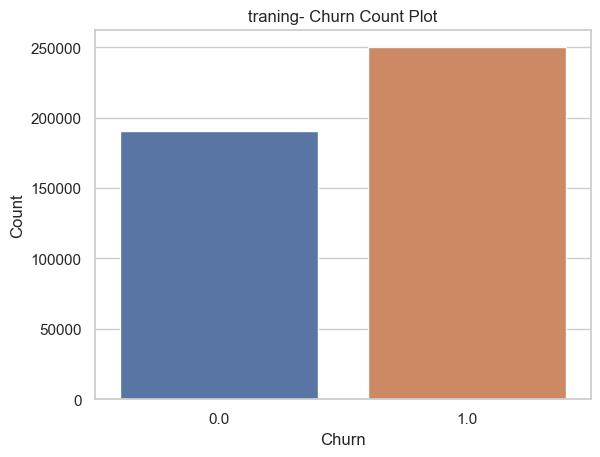

In [76]:
# traning data count plot
sns.set(style="whitegrid")
sns.countplot(data=training_df, x="Churn")
plt.title("traning- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


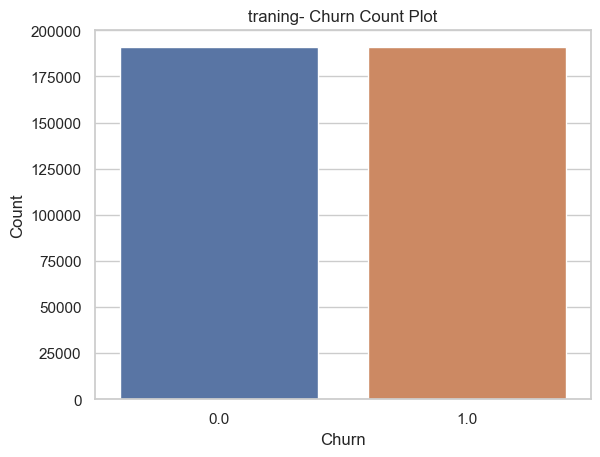

In [77]:
# remove observation train
churn_1_rows = training_df[training_df['Churn'] == 1]
random_sample = churn_1_rows.sample(n=59166, random_state=5508)
training_df = training_df.drop(random_sample.index)
trainData = copy.deepcopy(training_df)


# traning data count plot
sns.set(style="whitegrid")
sns.countplot(data=training_df, x="Churn")
plt.title("traning- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

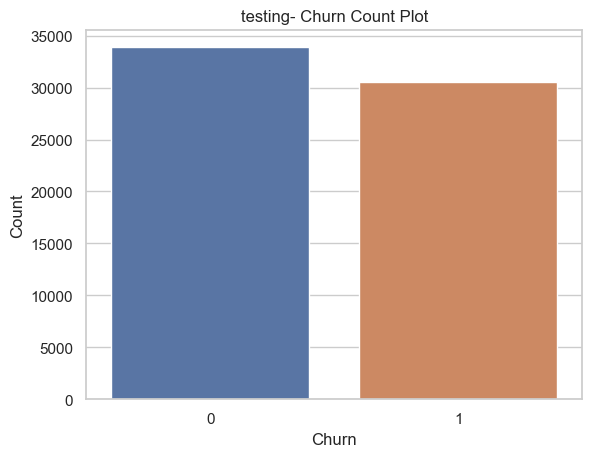

In [78]:
# test data count plot
sns.set(style="whitegrid")
sns.countplot(data=testing_df, x="Churn")
plt.title("testing- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


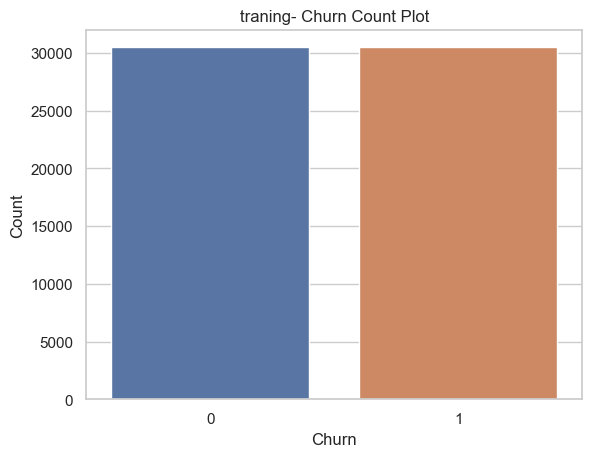

In [79]:
# remove observation from test
churn_1_rows = testing_df[testing_df['Churn'] == 0]
random_sample = churn_1_rows.sample(n=3388, random_state=5508)
testing_df = testing_df.drop(random_sample.index)

# traning data count plot
sns.set(style="whitegrid")
sns.countplot(data=testing_df, x="Churn")

# You can customize the plot further
plt.title("traning- Churn Count Plot")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [80]:
# /split training_df
# testing_df
from sklearn.model_selection import train_test_split
TotalDF= pd.concat([training_df, testing_df], axis=0, ignore_index=True)
training_df, testing_df, y_train, y_test = train_test_split(TotalDF, TotalDF['Churn'], test_size=0.2, random_state=5805)

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
182764,35.0,Female,43.0,25.0,1.0,20.0,Basic,Annual,483.40,9.0,1.0
262227,46.0,Female,60.0,19.0,4.0,13.0,Standard,Quarterly,730.75,3.0,0.0
270487,36.0,Male,46.0,12.0,1.0,8.0,Standard,Annual,849.98,9.0,0.0
282446,22.0,Female,12.0,25.0,2.0,7.0,Standard,Quarterly,981.51,3.0,0.0
5123,58.0,Male,54.0,28.0,7.0,29.0,Basic,Annual,847.00,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
62337,36.0,Male,7.0,16.0,10.0,0.0,Basic,Monthly,496.00,18.0,1.0
363048,29.0,Female,31.0,17.0,2.0,2.0,Basic,Annual,614.11,2.0,0.0
408355,36.0,Male,56.0,6.0,5.0,15.0,Premium,Monthly,215.00,25.0,0.0
151229,48.0,Female,53.0,22.0,6.0,10.0,Basic,Quarterly,113.00,4.0,1.0


In [81]:
# #remove to reduce load on model building

n=training_df[training_df['Churn'] == 0].shape[0]-25000
m=training_df[training_df['Churn'] == 1].shape[0]-25000
#remove to reduce load on model building
if m>0 and n>0:
    churn_1_rows = training_df[training_df['Churn'] == 1]
    random_sample = churn_1_rows.sample(n=m, random_state=5508)
    training_df = training_df.drop(random_sample.index)
    #remove to reduce load on model building
    churn_0_rows = training_df[training_df['Churn'] == 0]
    random_sample = churn_0_rows.sample(n=n, random_state=5508)
    training_df = training_df.drop(random_sample.index)


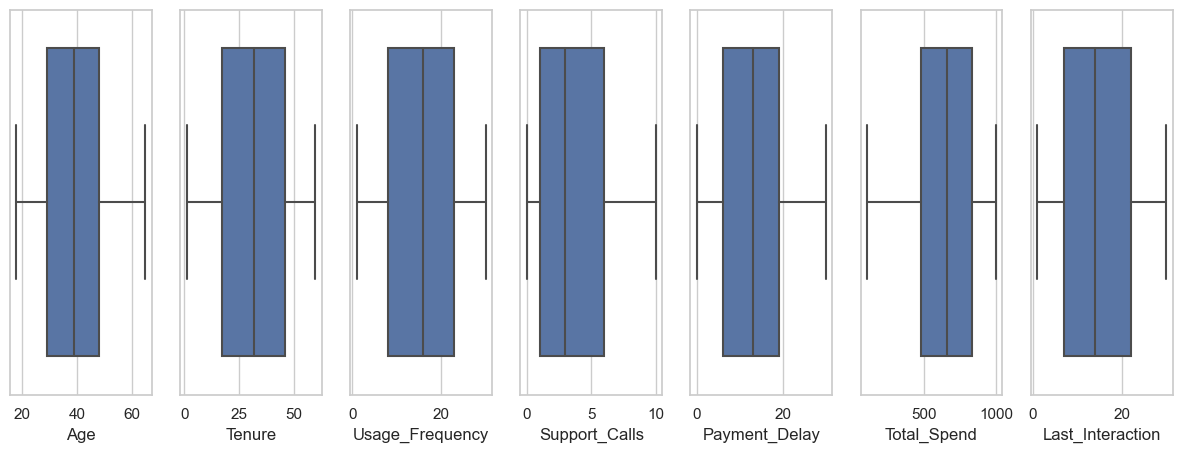

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named 'df'
# Features to be checked for outliers
# features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']

# Create subplots for each feature
plt.figure(figsize=(15, 5))
for i,feature in enumerate(['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']):
     # Adjust the figure size as needed
    plt.subplot(1,7,i+1)
    sns.boxplot(x=training_df[feature])
    # plt.title(f'Boxplot for {feature}')
plt.show()

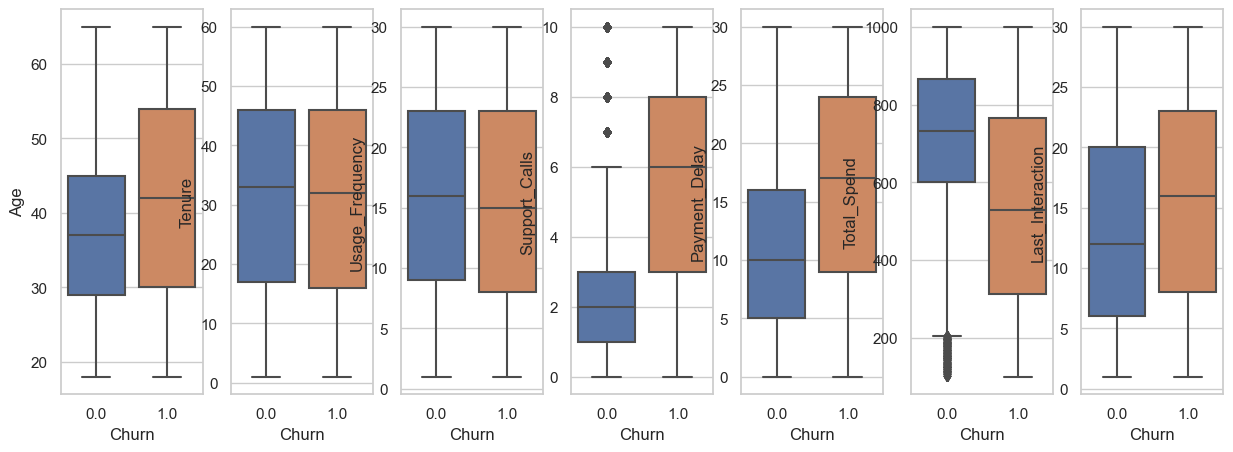

In [196]:
# Create combine subplots for each feature
plt.figure(figsize=(15, 5))
for i,feature in enumerate(['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']):
    plt.subplot(1,7,i+1)
    sns.boxplot(training_df,x='Churn',y=feature)
    # plt.title(f'Boxplot for {feature}')
plt.show()

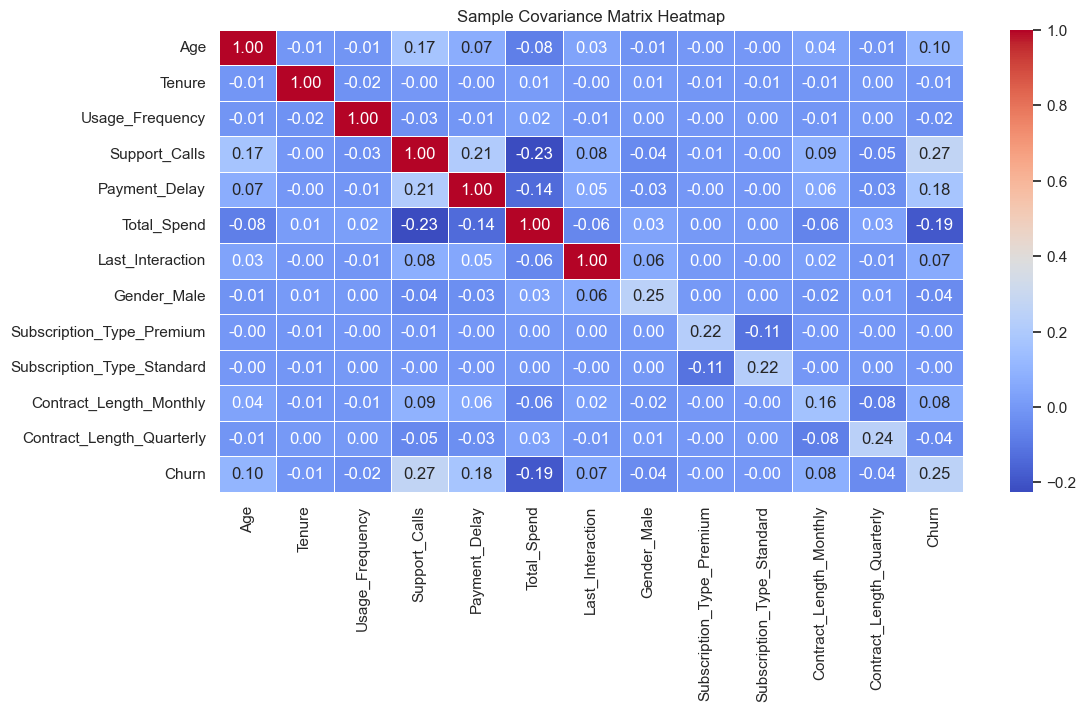

In [277]:
# Covariance Matrix display
def Standardized(dataframe):
    return (dataframe - dataframe.mean()) / dataframe.std()
encodingTrainDFForHitmap = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDfForHitmap= Standardized(encodingTrainDFForHitmap[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTrainDfForHitmap=pd.concat([standardizedTrainDfForHitmap,encodingTrainDFForHitmap[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly','Churn']]], axis=1)

covariance_matrix = standardizedTrainDfForHitmap.cov()
# plt.figure(figsize=(10, 8))
plt.figure(figsize=(12, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sample Covariance Matrix Heatmap')
# plt.tight_layout()
plt.show()


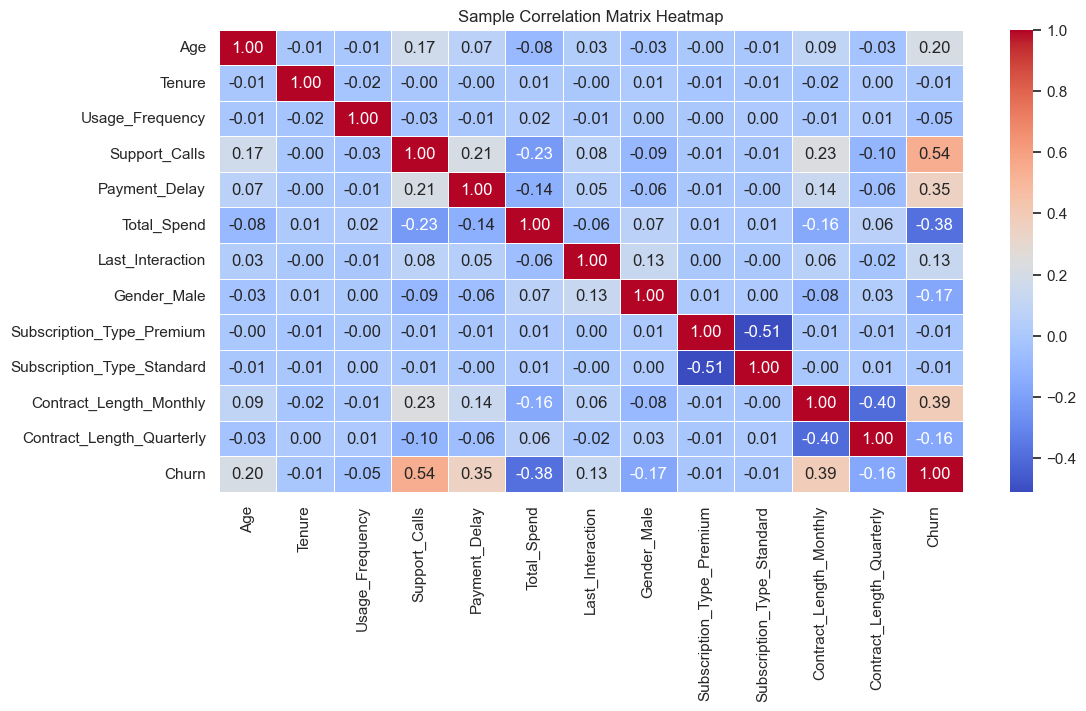

In [278]:
# Correlation coefficients Matrix
Correlation_matrix = standardizedTrainDfForHitmap.corr()
# plt.figure(figsize=(10, 8))
plt.figure(figsize=(12, 6))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sample Correlation Matrix Heatmap')
plt.show()

In [94]:
# Random Forest Analysis
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import pandas as pd
# def Standardized(dataframe):
#     return (dataframe - dataframe.mean()) / dataframe.std()

encodingTrainDF = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDf= Standardized(encodingTrainDF[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTrainDf=pd.concat([standardizedTrainDf,encodingTrainDF[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)

# X_train= standardizedTrainDf.drop(columns=['Churn'])
X_train = standardizedTrainDf
# X_train = sm.add_constant(X_train)
y_train = training_df['Churn']


encodingTestDF = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTestDf= Standardized(encodingTestDF[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTestDf=pd.concat([standardizedTestDf,encodingTestDF[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)

X_test= standardizedTestDf
# X_test = sm.add_constant(X_test)
y_test = testing_df['Churn']

# print(X_test.head(5).to_string())

In [95]:
# building RandomForestRegressor model
rf= RandomForestRegressor(random_state=5805)
rf.fit(X_train,y_train)
featureImportancs= rf.feature_importances_

indices= np.argsort(featureImportancs)
sortedFeatureImportancs = featureImportancs[indices]
sortedFeatureName= X_train.columns[indices]

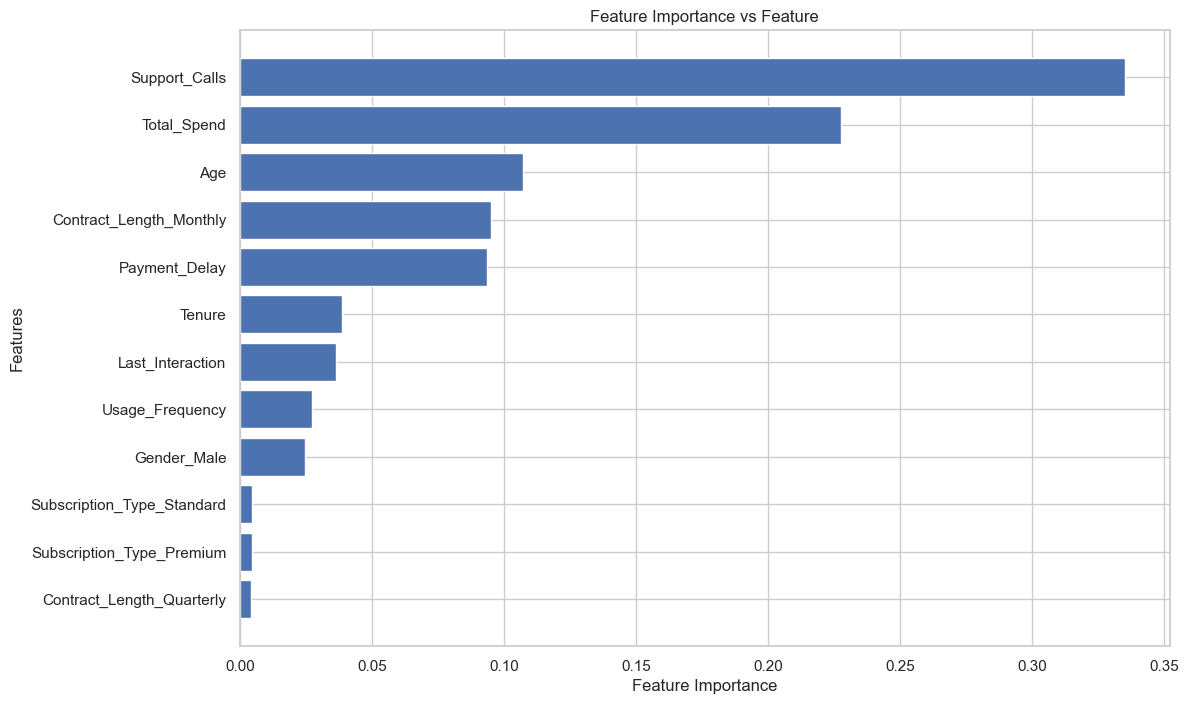

In [244]:
# building RandomForestRegressor model
# plot
plt.figure(figsize=(12,8))
plt.barh(range(sortedFeatureImportancs.size), sortedFeatureImportancs)
plt.yticks(range(sortedFeatureName.size), sortedFeatureName)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance vs Feature')
plt.grid(True)
plt.show()

In [245]:
# building RandomForestRegressor model
threshold= 0.005
selectedFeatures = [sortedFeatureName[i] for i, importance in enumerate(sortedFeatureImportancs) if importance >= threshold]
eliminatedFeatures = [sortedFeatureName[i] for i,importance in enumerate(sortedFeatureImportancs) if importance < threshold]
for i,j in enumerate(sortedFeatureName):
  print(f'{j}= {sortedFeatureImportancs[i].round(4)}')
print("selected features= ", selectedFeatures)
print("eliminated Features= ", eliminatedFeatures)

Contract_Length_Quarterly= 0.0044
Subscription_Type_Premium= 0.0046
Subscription_Type_Standard= 0.0046
Gender_Male= 0.0246
Usage_Frequency= 0.0275
Last_Interaction= 0.0364
Tenure= 0.0389
Payment_Delay= 0.0935
Contract_Length_Monthly= 0.095
Age= 0.1074
Total_Spend= 0.2275
Support_Calls= 0.3354
selected features=  ['Gender_Male', 'Usage_Frequency', 'Last_Interaction', 'Tenure', 'Payment_Delay', 'Contract_Length_Monthly', 'Age', 'Total_Spend', 'Support_Calls']
eliminated Features=  ['Contract_Length_Quarterly', 'Subscription_Type_Premium', 'Subscription_Type_Standard']


In [98]:
# PCA-Principal Component Analysis
# X_train is standardized
from sklearn.decomposition import PCA

pcaDatasetDF=copy.deepcopy(X_train)
pcaDatasetDF = pcaDatasetDF.astype(np.float64)
print(f'original data conditional number={np.linalg.cond(pcaDatasetDF)}')
pca=PCA()
pca.fit(pcaDatasetDF)
pcaCoordinate=pca.transform(pcaDatasetDF)
EVR= pca.explained_variance_ratio_
CVR = np.cumsum(EVR) # cumulative explained variance
numComponents = np.argmax(CVR >= 0.95) +1
print("number of Principal Component = "+ str(numComponents))

original data conditional number=3.7450836087167283
number of Principal Component = 10


In [99]:
# PCA-Principal Component Analysis
pca=PCA(numComponents)
pca.fit(pcaDatasetDF)
pcaCoordinate=pca.transform(pcaDatasetDF)
# print(pcaCoordinate)


In [100]:
# PCA-Principal Component Analysis
newPCAdf = pd.DataFrame(pcaCoordinate)
# print(newPCAdf.shape[1])
newColumnNames = {col : 'Component-'+ str(col+1) for col in newPCAdf.columns}
newPCAdf = newPCAdf.rename(columns = newColumnNames)
print(f'transform data conditional number={np.linalg.cond(newPCAdf)}')
print(newPCAdf.head(5).to_string())

transform data conditional number=2.538800910694372
   Component-1  Component-2  Component-3  Component-4  Component-5  Component-6  Component-7  Component-8  Component-9  Component-10
0    -0.168246     0.284432    -0.462960    -1.381932    -0.803253    -0.009692    -1.030336    -0.009881    -0.395706      0.426993
1    -0.346552    -0.931296    -1.247072    -1.547793     0.528725    -0.145027     0.172832     0.718777     0.465984      0.569830
2    -1.482954    -0.962699    -0.303123    -0.204289     0.241300    -0.167503     0.000275     0.697165    -0.335441     -0.492388
3    -2.267736     1.488960    -0.812944    -0.015734    -0.599048    -0.332892     0.915506     0.714658     0.320809      0.617245
4     1.401908     0.092909    -0.461936    -2.226800     0.908602    -1.853097     0.222923    -0.019932    -0.013887     -0.565587


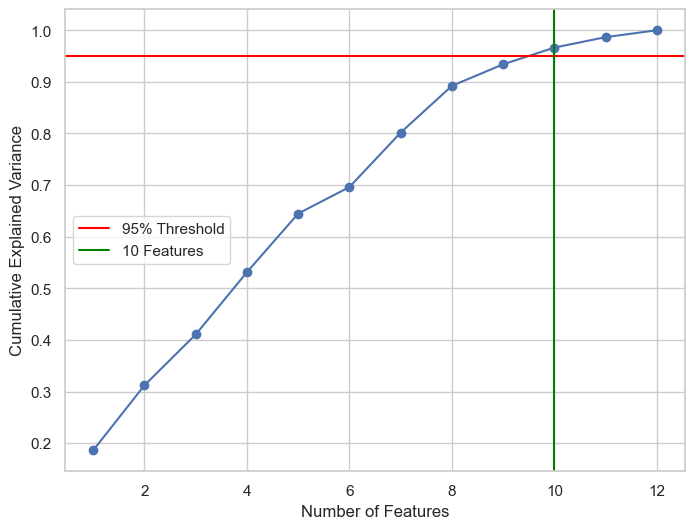

In [246]:
# PCA-Principal Component Analysis
# plt.figure(figsize=(8, 6))
# plt.plot(np.arange(1, pcaDatasetDF.shape[1]+ 1), CVR, marker='o')
# plt.xlabel('Number of Features')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, pcaDatasetDF.shape[1]+ 1), CVR, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='red', label='95% Threshold')
plt.axvline(x=numComponents, color='green', label=f'{numComponents} Features')
plt.legend()
plt.grid(True)
plt.show()

In [279]:
X_train

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly
182764,-0.351372,0.671318,1.078194,-0.860651,0.797234,-0.612633,-0.632480,False,False,False,False,False
262227,0.528922,1.659117,0.380405,0.109257,-0.042606,0.414528,-1.328673,False,False,True,False,True
270487,-0.271345,0.845636,-0.433683,-0.860651,-0.642492,0.909649,-0.632480,True,False,True,False,False
282446,-1.391719,-1.129961,1.078194,-0.537348,-0.762470,1.455849,-1.328673,False,False,True,False,True
5123,1.489243,1.310482,1.427089,1.079165,1.877029,0.897275,-0.284383,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
62337,-0.271345,-1.420490,0.031510,2.049073,-1.602310,-0.560309,0.411810,True,False,False,True,False
363048,-0.831532,-0.025951,0.147808,-0.537348,-1.362356,-0.069839,-1.444705,False,False,False,False,False
408355,-0.271345,1.426693,-1.131473,0.432559,0.197348,-1.727207,1.224035,True,True,False,True,False
151229,0.688976,1.252376,0.729299,0.755862,-0.402538,-2.150779,-1.212641,False,False,False,False,True


In [102]:
# SVD-Singular Value Decomposition Analysis
# X_train is standardized
from sklearn.decomposition import TruncatedSVD
svdDatasetDF=copy.deepcopy(X_train)
svd=TruncatedSVD(svdDatasetDF.shape[1])
svd.fit(svdDatasetDF)
svdCoordinate=svd.transform(svdDatasetDF)

EVR= svd.explained_variance_ratio_
CVR = np.cumsum(EVR) # cumulative explained variance
numComponents = np.argmax(CVR >= 0.95)+1
print("number of Component = "+ str(numComponents))

number of Component = 10


In [103]:
# SVD-Singular Value Decomposition Analysis
svd=TruncatedSVD(numComponents)
svd.fit(svdDatasetDF)
svdCoordinate=svd.transform(svdDatasetDF)

In [104]:
# SVD-Singular Value Decomposition Analysis

newSVDdf = pd.DataFrame(svdCoordinate)
newColumnNames = {col: 'Component-' + str(col + 1) for col in newSVDdf.columns}
newSVDdf = newSVDdf.rename(columns=newColumnNames)
print(newSVDdf.head().to_string())
singularValue=svd.singular_values_
print(f"\nSingular Values: {singularValue.round(3)}")
# df_svd = pd.DataFrame(pcaCoordinate, columns=[f'Component_{i+1}' for i in range(pcaCoordinate.shape[1])])
# print(df_svd.head(5))

   Component-1  Component-2  Component-3  Component-4  Component-5  Component-6  Component-7  Component-8  Component-9  Component-10
0    -0.194057    -0.331160    -0.531541    -1.301789    -0.582069     0.597275     0.037487    -1.031022    -0.005282      0.059696
1    -0.406243     0.876004    -0.791112    -1.327250     1.013737     1.249478    -0.014702     0.243009     0.716984     -0.630745
2    -1.553369     0.990530     0.155704    -0.139060     0.478509     0.862307    -0.068234     0.063881     0.695849      0.575712
3    -2.323301    -1.509822    -0.255618     0.112863    -0.260523     1.091049    -0.229399     0.969299     0.713853     -0.533330
4     1.340998    -0.087163    -0.052904    -2.110459     1.243093     1.005981    -1.749011     0.275019    -0.021808      0.272794

Singular Values: [274.975 225.973 225.148 221.028 217.179 211.472 207.416 191.7   129.983
 114.453]


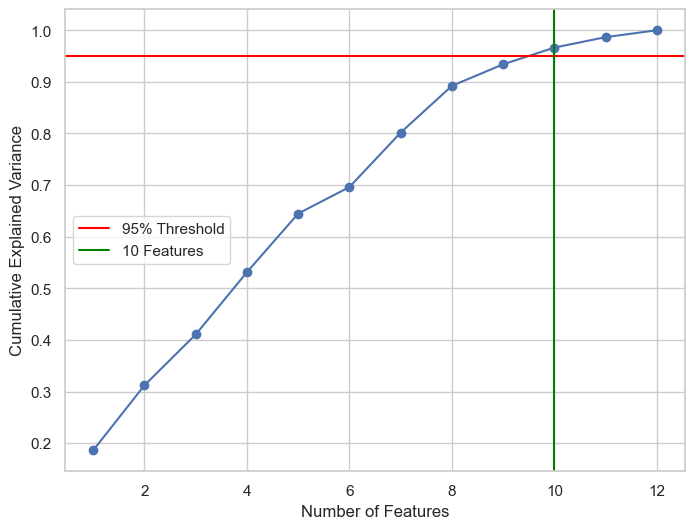

In [247]:
# SVD-Singular Value Decomposition Analysis
# plt.figure(figsize=(8, 6))
# plt.plot(np.arange(1, newSVDdf.shape[1]+ 1), CVR, marker='o')
# plt.xlabel('Number of Features')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, svdDatasetDF.shape[1]+ 1), CVR, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='red', label='95% Threshold')
plt.axvline(x=numComponents, color='green', label=f'{numComponents} Features')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame named 'df' containing your dataset
# Select the features for which you want to calculate VIF
# Exclude non-numeric columns and the target variable 'Churn'


# Calculate VIF for each feature
p_train = X_train.astype(int)

vif_data = pd.DataFrame()
vif_data["Feature"] = p_train.columns
vif_data["VIF"] = [variance_inflation_factor(p_train.values, i) for i in range(p_train.shape[1])]

# Sort the features by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Print the VIF values
print(vif_data)

                       Feature       VIF
0                  Gender_Male  1.808764
1    Contract_Length_Quarterly  1.571163
2   Subscription_Type_Standard  1.511580
3    Subscription_Type_Premium  1.506384
4      Contract_Length_Monthly  1.329895
5                Support_Calls  1.106998
6                Payment_Delay  1.055270
7                  Total_Spend  1.051531
8                          Age  1.033161
9             Last_Interaction  1.012836
10             Usage_Frequency  1.001613
11                      Tenure  1.001282


In [107]:
# Print the VIF values
# print(vif_data[Feature])

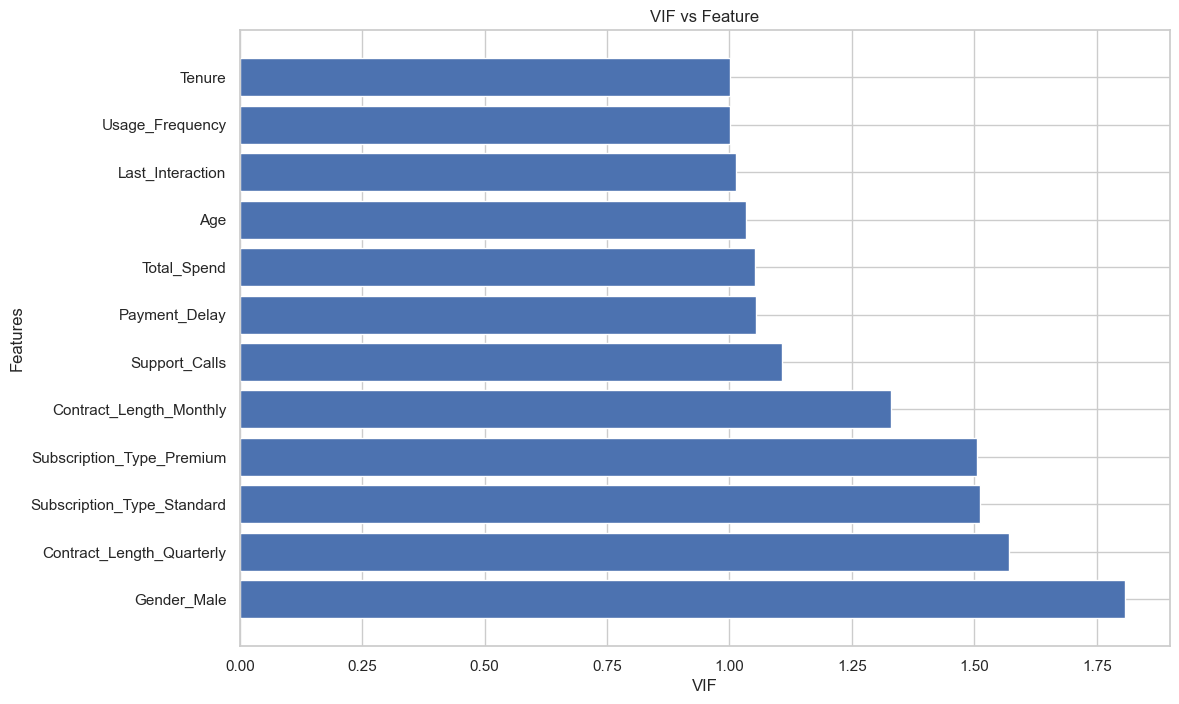

In [248]:
# VIF
# plot
plt.figure(figsize=(12,8))
plt.barh(range(vif_data['VIF'].size), vif_data['VIF'])
plt.yticks(range(vif_data['Feature'].size), vif_data['Feature'])
plt.xlabel('VIF')
plt.ylabel('Features')
plt.title('VIF vs Feature')
plt.grid(True)
plt.show()

In [157]:
# T-test analysis - LinearR
LinearRencodingTrainDF = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
LinearRstandardizedTrainDf= Standardized(LinearRencodingTrainDF[['Age','Tenure','Usage_Frequency','Payment_Delay','Last_Interaction','Total_Spend']])
LinearRstandardizedTrainDf=pd.concat([LinearRstandardizedTrainDf,LinearRencodingTrainDF[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly','Churn']]], axis=1)

# X_train= standardizedTrainDf.drop(columns=['Churn'])
X_train_LinearR = LinearRstandardizedTrainDf
# X_train = sm.add_constant(X_train)
y_train_LinearR = Standardized(training_df['Support_Calls'])


LinearRencodingTestDF = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
LinearRstandardizedTestDf= Standardized(LinearRencodingTestDF[['Age','Tenure','Usage_Frequency','Payment_Delay','Last_Interaction','Total_Spend']])
LinearRstandardizedTestDf=pd.concat([LinearRstandardizedTestDf,LinearRencodingTestDF[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly','Churn']]], axis=1)

X_test_LinearR= LinearRstandardizedTestDf
y_test_LinearR = Standardized(testing_df['Support_Calls'])

# add const
X_train_LinearR = sm.add_constant(X_train_LinearR)
X_test_LinearR = sm.add_constant(X_test_LinearR)

In [158]:
# T-test analysis - LinearR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train_LinearR, y_train_LinearR)
y_pred_train_LinearR = linreg.predict(X_train_LinearR)
y_pred_LinearR = linreg.predict(X_test_LinearR)

# Calculate R-squared
originalTestTaarget= testing_df['Support_Calls']
# deStandardizedTargetTest = y_test_ols * originalTestTaarget.std() + originalTestTaarget.mean()
mse_LinearR = mean_squared_error(y_test_LinearR * originalTestTaarget.std() + originalTestTaarget.mean(), y_pred_LinearR *originalTestTaarget.std() + originalTestTaarget.mean())


r_squared_LinearR = linreg.score(X_train_LinearR, y_train_LinearR)
n = len(y_train_LinearR)
p = X_train_LinearR.shape[1] - 1  # Subtracting 1 for the intercept term
adjusted_r_squared_LinearR = 1 - (1 - r_squared_LinearR) * (n - 1) / (n - p - 1)
aic_LinearR = n*np.log(mse_LinearR) + 2*p
bic_LinearR = n*np.log(mse_LinearR) + p*np.log(n)

print(f"R-squared:{r_squared_LinearR}, adjusted R-square: {adjusted_r_squared_LinearR}, AIC:{aic_LinearR}, BIC:{bic_LinearR} , Mean Squared Error:{mse_LinearR} ")

R-squared:0.30049266309880773, adjusted R-square: 0.3003247376773419, AIC:95482.03760178569, BIC:95587.87494119862 , Mean Squared Error:6.747423660064953 


In [159]:
# T-test analysis - LinearR
coefficients = linreg.coef_
intercept = linreg.intercept_
coefficients_formatted = [f'{coef:.3f}' for coef in coefficients]
intercept_formatted = f'{intercept:.3f}'

coefficients = [(float(coef)) for coef in coefficients_formatted][1:]
columns = X_train_LinearR.columns[1:]

equation = f"Support_Calls = {float(intercept_formatted):.3f}"

for coef, column in zip(coefficients[0:], columns):
    if(coef>0):
        equation += f" + {coef:.3f} {column}"
    elif coef <0:
        equation += f" {coef:.3f} {column}"

print("LinearRegression Model Equation:\n", equation)

LinearRegression Model Equation:
 Support_Calls = -0.514 + 0.060 Age + 0.002 Tenure -0.001 Usage_Frequency + 0.017 Payment_Delay + 0.006 Last_Interaction -0.020 Total_Spend + 0.008 Gender_Male -0.013 Subscription_Type_Premium -0.004 Subscription_Type_Standard + 0.053 Contract_Length_Monthly -0.009 Contract_Length_Quarterly + 1.018 Churn


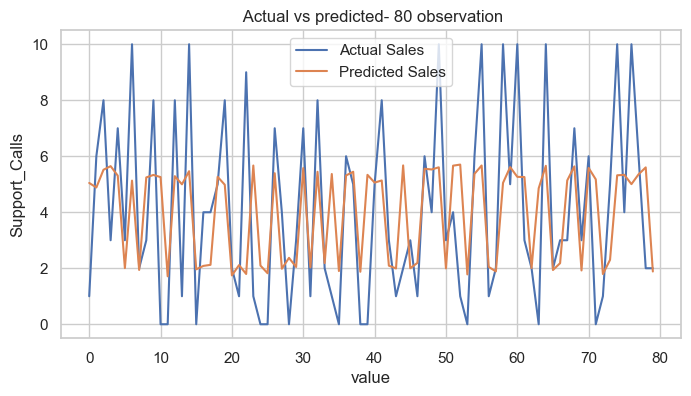

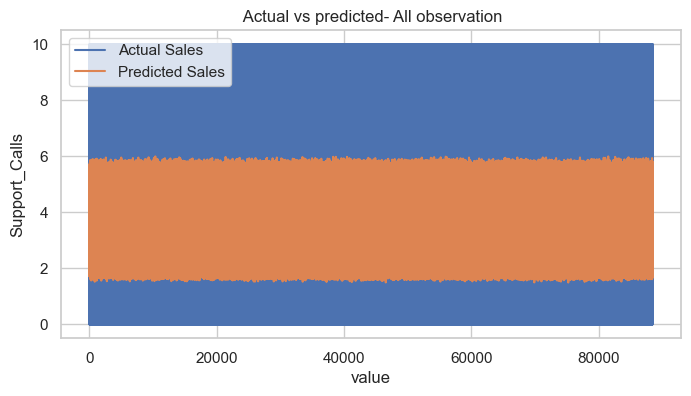

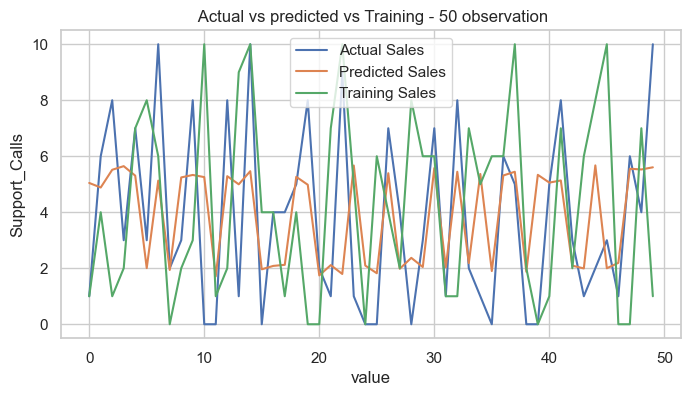

In [249]:
# T-test analysis - LinearR
from sklearn.metrics import make_scorer, mean_squared_error
originalTestTaarget= testing_df['Support_Calls'] # non Standardized Target test
originalTrainTaarget= training_df['Support_Calls']

deStandardizedTargetTest = y_test_LinearR * originalTestTaarget.std() + originalTestTaarget.mean()
deStandardizedTargetPred= y_pred_LinearR * originalTestTaarget.std() + originalTestTaarget.mean()
deStandardizedTargetTrain= y_train_LinearR * originalTrainTaarget.std() + originalTrainTaarget.mean()

# deStandardizedTargetPred_df= pd.DataFrame(deStandardizedTargetPred, columns=['Churn'])
             
deStandardizedTargetTest= deStandardizedTargetTest.reset_index().drop(['index'],axis=1)
# deStandardizedTargetPred= deStandardizedTargetPred_df.reset_index().drop(['index'],axis=1)
deStandardizedTargetTrain= deStandardizedTargetTrain.reset_index().drop(['index'],axis=1)



# plot
plt.figure(figsize=(8, 4))
plt.plot(deStandardizedTargetTest[:80], label='Actual Sales')
plt.plot(deStandardizedTargetPred[:80], label='Predicted Sales')
plt.xlabel("value")
plt.ylabel("Support_Calls")
plt.title(' Actual vs predicted- 80 observation')
plt.legend()
plt.grid(True)
plt.show()
# plot
plt.figure(figsize=(8, 4))
plt.plot(deStandardizedTargetTest, label='Actual Sales')
plt.plot(deStandardizedTargetPred, label='Predicted Sales')
plt.xlabel("value")
plt.ylabel("Support_Calls")
plt.title(' Actual vs predicted- All observation')
plt.legend()
plt.grid(True)
plt.show()

# plot
plt.figure(figsize=(8, 4))
plt.plot(deStandardizedTargetTest[:50], label='Actual Sales')
plt.plot(deStandardizedTargetPred[:50], label='Predicted Sales')
plt.plot(deStandardizedTargetTrain[:50], label='Training Sales')
plt.xlabel("value")
plt.ylabel("Support_Calls")
plt.title(' Actual vs predicted vs Training - 50 observation')
plt.legend()
plt.grid(True)
plt.show()
# plot
# plt.figure(figsize=(8, 4))
# plt.plot(deStandardizedTargetTest, label='Actual Sales')
# plt.plot(deStandardizedTargetPred, label='Predicted Sales')
# plt.plot(deStandardizedTargetTrain, label='Training Sales')
# plt.xlabel("value")
# plt.ylabel("Support_Calls")
# plt.title(' Actual vs predicted vs Training - all observation')
# plt.legend()
# plt.grid(True)
# plt.show()

In [161]:
# T-test analysis - OLS
OLSencodingTrainDF = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
OLSstandardizedTrainDf= Standardized(OLSencodingTrainDF[['Age','Tenure','Usage_Frequency','Payment_Delay','Last_Interaction','Total_Spend']])
OLSstandardizedTrainDf=pd.concat([OLSstandardizedTrainDf,OLSencodingTrainDF[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly','Churn']]], axis=1)

# X_train= standardizedTrainDf.drop(columns=['Churn'])
X_train_ols = OLSstandardizedTrainDf
# X_train = sm.add_constant(X_train)
y_train_ols = Standardized(training_df['Support_Calls'])


OLSencodingTestDF = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
OLSstandardizedTestDf= Standardized(OLSencodingTestDF[['Age','Tenure','Usage_Frequency','Payment_Delay','Last_Interaction','Total_Spend']])
OLSstandardizedTestDf=pd.concat([OLSstandardizedTestDf,OLSencodingTestDF[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly','Churn']]], axis=1)

X_test_ols= OLSstandardizedTestDf
y_test_ols = Standardized(testing_df['Support_Calls'])

# add const
X_train_ols = sm.add_constant(X_train_ols)
X_test_ols = sm.add_constant(X_test_ols)

# print(X_train_ols.head(5))

In [162]:
# convert bool data to 0/1
for i,j in X_train_ols.dtypes.items():
    if j=='bool':
        X_train_ols[i]= X_train_ols[i].astype(int)
for i,j in X_test_ols.dtypes.items():
    if j=='bool':
        X_test_ols[i]= X_test_ols[i].astype(int)

In [163]:
# T-test analysis - OLS
results = pd.DataFrame(columns=['Features', 'AIC', 'BIC', 'Adj_R2', 'P-value'])
results._clear_item_cache()
import statsmodels.api as sm
OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
results = results._append({'Features': OLSmodel.pvalues.idxmax(),
      'AIC': OLSmodel.aic,
      'BIC': OLSmodel.bic,
      'Adj_R2': OLSmodel.rsquared_adj,
      'P-value': OLSmodel.pvalues.max()}, ignore_index=True)


In [164]:
# T-test analysis - OLS
print(OLSmodel.summary())
print(f'feature to remove: {OLSmodel.pvalues.idxmax()}')


                            OLS Regression Results                            
Dep. Variable:          Support_Calls   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1789.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:12:30   Log-Likelihood:                -62012.
No. Observations:               50000   AIC:                         1.240e+05
Df Residuals:                   49987   BIC:                         1.242e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [165]:
# F-Test
from scipy.stats import f
F_statistic = OLSmodel.fvalue
df_model = OLSmodel.df_model
df_resid = OLSmodel.df_resid
alpha = 0.05
critical_F = f.ppf(1 - alpha, df_model, df_resid)

if F_statistic > critical_F:
    print("Reject null hypothesis. Model is statistically significant.")
else:
    print("Null hypothesis fail to reject. Model is not statistically significant.")


Reject null hypothesis. Model is statistically significant.


In [276]:
print(F_statistic, critical_F)

1789.441172609391 1.7523657365158176


In [166]:
# OLSmodel.pvalues[OLSmodel.pvalues.idxmax()]
while OLSmodel.pvalues[OLSmodel.pvalues.idxmax()].round(3) != 0:
    X_train_ols= X_train_ols.drop(columns=[OLSmodel.pvalues.idxmax()])
    
    OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
    results = results._append({'Features': OLSmodel.pvalues.idxmax(),
      'AIC': OLSmodel.aic,
      'BIC': OLSmodel.bic,
      'Adj_R2': OLSmodel.rsquared_adj,
      'P-value': OLSmodel.pvalues.max()}, ignore_index=True)
    print(OLSmodel.summary())
print('dropped feature')
# Drop the last row
results = results.drop(results.index[-1])
print(results.round(6))

                            OLS Regression Results                            
Dep. Variable:          Support_Calls   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1952.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:12:33   Log-Likelihood:                -62012.
No. Observations:               50000   AIC:                         1.240e+05
Df Residuals:                   49988   BIC:                         1.242e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [991]:
# T-test analysis - OLS
# X_train_ols= X_train_ols.drop(columns=['Subscription_Type_Premium'])

In [992]:
# T-test analysis - OLS
# OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
# results = results._append({'Features': OLSmodel.pvalues.idxmax(),
#       'AIC': OLSmodel.aic,
#       'BIC': OLSmodel.bic,
#       'Adj_R2': OLSmodel.rsquared_adj,
#       'P-value': OLSmodel.pvalues.max()}, ignore_index=True)
# print(OLSmodel.summary())

In [993]:
# T-test analysis - OLS
# X_train_ols= X_train_ols.drop(columns=['Subscription_Type_Standard'])
# OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
# results = results._append({'Features': OLSmodel.pvalues.idxmax(),
#       'AIC': OLSmodel.aic,
#       'BIC': OLSmodel.bic,
#       'Adj_R2': OLSmodel.rsquared_adj,
#       'P-value': OLSmodel.pvalues.max()}, ignore_index=True)
# print(OLSmodel.summary())


In [994]:
# T-test analysis - OLS
# X_train_ols= X_train_ols.drop(columns=['Contract_Length_Quarterly'])
# OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
# results = results._append({'Features': OLSmodel.pvalues.idxmax(),
#       'AIC': OLSmodel.aic,
#       'BIC': OLSmodel.bic,
#       'Adj_R2': OLSmodel.rsquared_adj,
#       'P-value': OLSmodel.pvalues.max()}, ignore_index=True)
# print(OLSmodel.summary())

In [995]:
# T-test analysis - OLS
# X_train_ols= X_train_ols.drop(columns=['Tenure'])
# OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
# results = results._append({'Features': OLSmodel.pvalues.idxmax(),
#       'AIC': OLSmodel.aic,
#       'BIC': OLSmodel.bic,
#       'Adj_R2': OLSmodel.rsquared_adj,
#       'P-value': OLSmodel.pvalues.max()}, ignore_index=True)
# print(OLSmodel.summary())

In [996]:
# T-test analysis - OLS
# X_train_ols= X_train_ols.drop(columns=['Usage_Frequency'])
# OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
# results = results._append({'Features': OLSmodel.pvalues.idxmax(),
#       'AIC': OLSmodel.aic,
#       'BIC': OLSmodel.bic,
#       'Adj_R2': OLSmodel.rsquared_adj,
#       'P-value': OLSmodel.pvalues.max()}, ignore_index=True)
# print(OLSmodel.summary())

In [997]:
# T-test analysis - OLS
# X_train_ols= X_train_ols.drop(columns=['Last_Interaction'])
# OLSmodel = sm.OLS(y_train_ols,X_train_ols).fit()
# print(OLSmodel.summary())

In [167]:
equation= 'Support_Calls= '
for i,feature in enumerate(OLSmodel.params.items()):
    if feature[0] != 'const':
        if (feature[1] > 0):
            equation = equation + ' +'
        else:
            equation = equation + ' -'
        equation = equation + ' ' + str(abs(feature[1].__round__(3))) + ' ' + feature[0]
    else:
        equation= equation + str(feature[1].__round__(3))
print("OLS model equation\n",equation)
# remove Standardized dataframe * dataframe.std() +dataframe.mean()


OLS model equation
 Support_Calls= -0.52 + 0.06 Age + 0.017 Payment_Delay - 0.02 Total_Spend + 0.058 Contract_Length_Monthly + 1.018 Churn


In [168]:
# T-test analysis - OLS
# print('dropped feature')
# print(results.round(6))
X_test_ols= X_test_ols.drop(columns=results.Features)

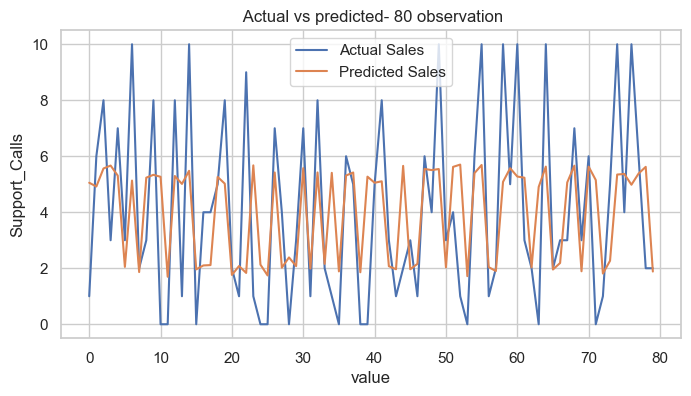

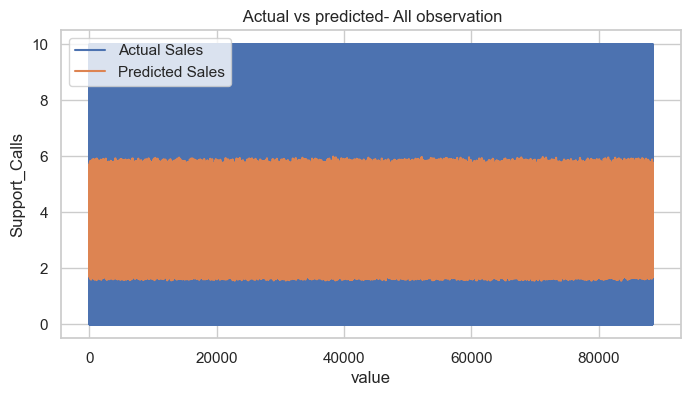

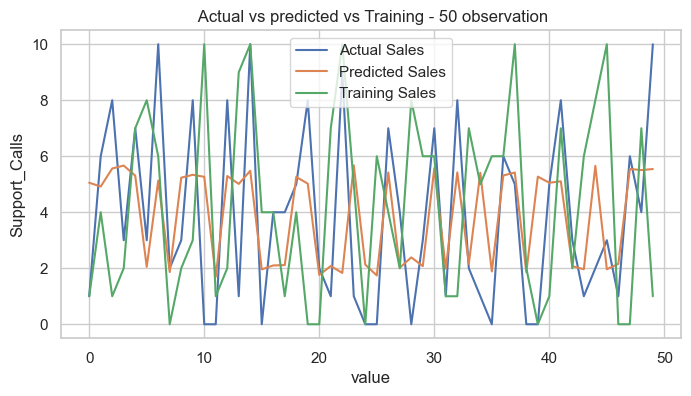

Mean Squared Error: 6.747


In [250]:
# T-test analysis - OLS
from prettytable import PrettyTable
from sklearn.metrics import make_scorer, mean_squared_error
OLStargetPred= OLSmodel.predict(X_test_ols)
originalTestTaarget= testing_df['Support_Calls'] # non Standardized Target test
originalTrainTaarget= training_df['Support_Calls']

deStandardizedTargetTest = y_test_ols * originalTestTaarget.std() + originalTestTaarget.mean()
deStandardizedTargetPred= OLStargetPred * originalTestTaarget.std() + originalTestTaarget.mean()
deStandardizedTargetTrain= y_train_ols * originalTrainTaarget.std() + originalTrainTaarget.mean()

deStandardizedTargetTest= deStandardizedTargetTest.reset_index().drop(['index'],axis=1)
deStandardizedTargetPred= deStandardizedTargetPred.reset_index().drop(['index'],axis=1)
deStandardizedTargetTrain= deStandardizedTargetTrain.reset_index().drop(['index'],axis=1)



# plot
plt.figure(figsize=(8, 4))
plt.plot(deStandardizedTargetTest[:80], label='Actual Sales')
plt.plot(deStandardizedTargetPred[:80], label='Predicted Sales')
plt.xlabel("value")
plt.ylabel("Support_Calls")
plt.title(' Actual vs predicted- 80 observation')
plt.legend()
plt.grid(True)
plt.show()
# plot
plt.figure(figsize=(8, 4))
plt.plot(deStandardizedTargetTest, label='Actual Sales')
plt.plot(deStandardizedTargetPred, label='Predicted Sales')
plt.xlabel("value")
plt.ylabel("Support_Calls")
plt.title(' Actual vs predicted- All observation')
plt.legend()
plt.grid(True)
plt.show()

# plot
plt.figure(figsize=(8, 4))
plt.plot(deStandardizedTargetTest[:50], label='Actual Sales')
plt.plot(deStandardizedTargetPred[:50], label='Predicted Sales')
plt.plot(deStandardizedTargetTrain[:50], label='Training Sales')
plt.xlabel("value")
plt.ylabel("Support_Calls")
plt.title(' Actual vs predicted vs Training - 50 observation')
plt.legend()
plt.grid(True)
plt.show()
# plot
# plt.figure(figsize=(8, 4))
# plt.plot(deStandardizedTargetTest, label='Actual Sales')
# plt.plot(deStandardizedTargetPred, label='Predicted Sales')
# plt.plot(deStandardizedTargetTrain, label='Training Sales')
# plt.xlabel("value")
# plt.ylabel("Support_Calls")
# plt.title(' Actual vs predicted vs Training - all observation')
# plt.legend()
# plt.grid(True)
# plt.show()

# accuracy
mse_OLS = mean_squared_error(deStandardizedTargetTest, deStandardizedTargetPred)
print("Mean Squared Error:", mse_OLS.__round__(3))

In [170]:
# T-test analysis - OLS
r_squared = linreg.score(X_test_LinearR, y_test_LinearR)
originalTrainTaarget= training_df['Support_Calls']
# deStandardizedTargetTest = y_test_ols * originalTestTaarget.std() + originalTestTaarget.mean()
# mse_LinearR = mean_squared_error(y_train_LinearR * originalTrainTaarget.std() + originalTrainTaarget.mean(), y_pred_train_LinearR)

r_squared_OLS = OLSmodel.rsquared
adjusted_r_squared_OLS = OLSmodel.rsquared_adj
aic_OLS = OLSmodel.aic
bic_OLS = OLSmodel.bic
# compare table
table = PrettyTable()
table.field_names = ["Metric", "OLS Model", "Linear Regression Model"]
table.float_format = ".3"
table.add_row(["R-squared", r_squared_OLS, r_squared_LinearR])
table.add_row(["Adjusted R-squared", adjusted_r_squared_OLS, adjusted_r_squared_LinearR])
table.add_row(["AIC", aic_OLS, aic_LinearR])
table.add_row(["BIC", bic_OLS, bic_LinearR])
table.add_row(["MSE", mse_OLS, mse_LinearR])
print(table)

+--------------------+------------+-------------------------+
|       Metric       | OLS Model  | Linear Regression Model |
+--------------------+------------+-------------------------+
|     R-squared      |   0.300    |          0.300          |
| Adjusted R-squared |   0.300    |          0.300          |
|        AIC         | 124043.354 |        95482.038        |
|        BIC         | 124096.273 |        95587.875        |
|        MSE         |   6.747    |          6.747          |
+--------------------+------------+-------------------------+


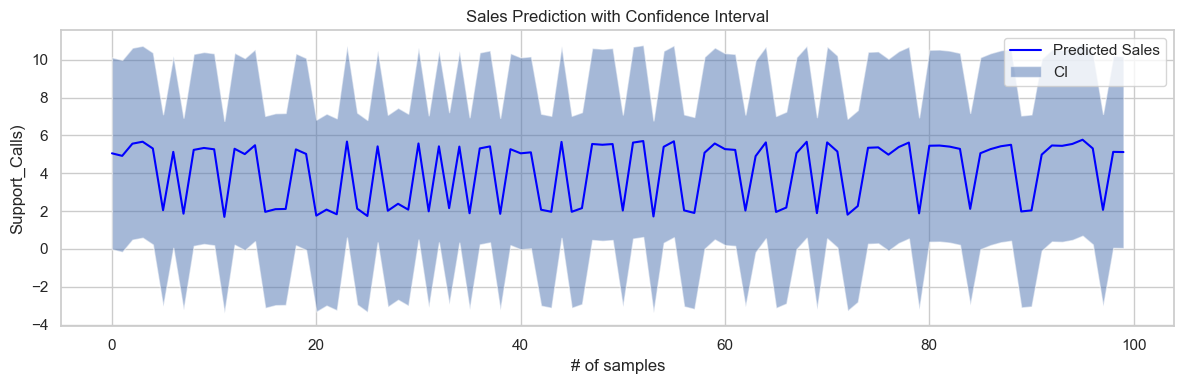

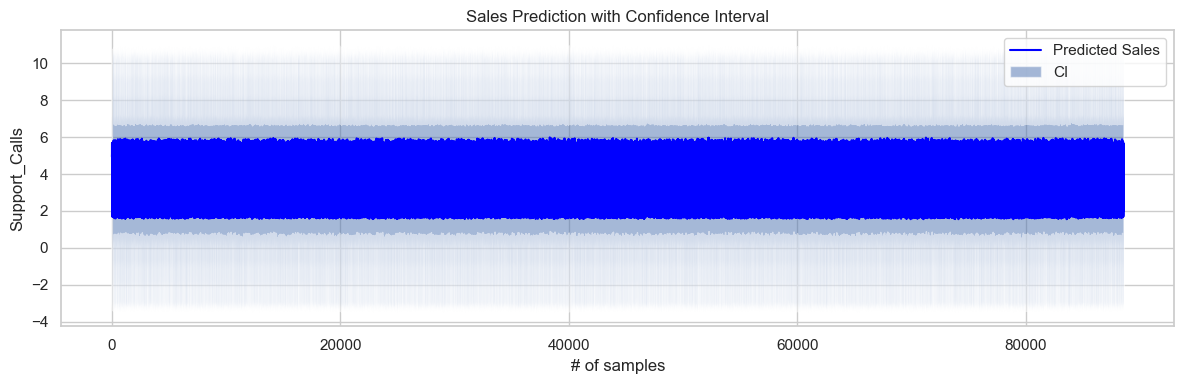

In [252]:
# T-test analysis - OLS
model1featureTest= X_test_ols
model1OriginalSalesDF= testing_df['Support_Calls']
prediction_intervals = OLSmodel.get_prediction(model1featureTest)
lowerBounds = prediction_intervals.summary_frame()["obs_ci_lower"]
upperBounds = prediction_intervals.summary_frame()["obs_ci_upper"]
lowerBounds = lowerBounds * model1OriginalSalesDF.std() +model1OriginalSalesDF.mean()
upperBounds = upperBounds * model1OriginalSalesDF.std() + model1OriginalSalesDF.mean()

# plot
No_of_ob_to_show= 100
plt.figure(figsize=(12,4))
plt.plot(deStandardizedTargetPred[:No_of_ob_to_show], label="Predicted Sales",color= "blue")
plt.fill_between(range(len(deStandardizedTargetTest[:No_of_ob_to_show])),lowerBounds[:No_of_ob_to_show], upperBounds[:No_of_ob_to_show], alpha=0.5, label="CI")
plt.xlabel("# of samples")
plt.ylabel("Support_Calls)")
plt.legend()
plt.grid(True)
plt.title("Sales Prediction with Confidence Interval")
plt.tight_layout()
plt.show()
# plot
plt.figure(figsize=(12,4))
plt.plot(deStandardizedTargetPred, label="Predicted Sales",color= "blue")
plt.fill_between(range(len(deStandardizedTargetTest)),lowerBounds, upperBounds, alpha=0.5, label="CI")
plt.xlabel("# of samples")
plt.ylabel("Support_Calls")
plt.legend()
plt.grid(True)
plt.title("Sales Prediction with Confidence Interval")
plt.tight_layout()
plt.show()


In [173]:
#remove to reduce load on model building
# churn_1_rows = training_df[training_df['Churn'] == 1]
# random_sample = churn_1_rows.sample(n=165833, random_state=5508)
# training_df = training_df.drop(random_sample.index)
# #remove to reduce load on model building
# churn_0_rows = training_df[training_df['Churn'] == 0]
# random_sample = churn_0_rows.sample(n=165833, random_state=5508)
# training_df = training_df.drop(random_sample.index)
# 
# 
# print(training_df.shape)

In [174]:
# DecisionTreeClassifier
import pandas as pd
import seaborn as sbn
from sklearn.tree import DecisionTreeClassifier
encodingTrainDFForDT = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_DT = encodingTrainDFForDT[['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly']]
yTrain_DT = encodingTrainDFForDT['Churn']

encodingTestDFForDT = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
XTest_DT = encodingTestDFForDT[['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly']]
yTest_DT = encodingTestDFForDT['Churn']

In [175]:
# DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve,f1_score
DTclf = DecisionTreeClassifier(random_state=5805)
DTclf.fit(XTrain_DT,yTrain_DT)
yTrainPredicted_DT = DTclf.predict(XTrain_DT)
yTestPredicted_DT = DTclf.predict(XTest_DT)
print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
# DecisionTreeClassifier
# feature importance
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["feature", "Feature Importances"]

# featureImportances={}
featureColumns= XTrain_DT.columns
for i,j in enumerate(featureColumns):
  table.add_row([j, DTclf.feature_importances_[i].round(5)])
table.sortby = "Feature Importances"
print(table)

DecisionTree Test accuracy 0.88221
+----------------------------+---------------------+
|          feature           | Feature Importances |
+----------------------------+---------------------+
| Subscription_Type_Standard |       0.00436       |
| Contract_Length_Quarterly  |        0.0047       |
| Subscription_Type_Premium  |       0.00547       |
|      Usage_Frequency       |       0.02544       |
|        Gender_Male         |       0.02955       |
|      Last_Interaction      |       0.03163       |
|           Tenure           |       0.03966       |
|       Payment_Delay        |       0.09388       |
|  Contract_Length_Monthly   |       0.10105       |
|            Age             |       0.10417       |
|        Total_Spend         |       0.22538       |
|       Support_Calls        |       0.33471       |
+----------------------------+---------------------+


In [176]:
# DecisionTreeClassifier
newXTrain_DT= XTrain_DT.drop(['Contract_Length_Quarterly'],axis=1)
newXTest_DT=XTest_DT.drop(['Contract_Length_Quarterly'],axis=1)

In [177]:
# DecisionTreeClassifier
DTclf = DecisionTreeClassifier(random_state=5805)
DTclf.fit(newXTrain_DT,yTrain_DT)
yTrainPredicted_DT = DTclf.predict(newXTrain_DT)
yTestPredicted_DT = DTclf.predict(newXTest_DT)
print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
# DecisionTreeClassifier
# feature importance
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["feature", "Feature Importances"]

# featureImportances={}
featureColumns= newXTrain_DT.columns
for i,j in enumerate(featureColumns):
  table.add_row([j, DTclf.feature_importances_[i].round(5)])
table.sortby = "Feature Importances"
print(table)

DecisionTree Test accuracy 0.8814
+----------------------------+---------------------+
|          feature           | Feature Importances |
+----------------------------+---------------------+
| Subscription_Type_Standard |       0.00419       |
| Subscription_Type_Premium  |       0.00562       |
|      Usage_Frequency       |       0.02662       |
|        Gender_Male         |       0.03004       |
|      Last_Interaction      |       0.03323       |
|           Tenure           |       0.03995       |
|       Payment_Delay        |       0.09239       |
|  Contract_Length_Monthly   |       0.10032       |
|            Age             |        0.1058       |
|        Total_Spend         |       0.22714       |
|       Support_Calls        |        0.3347       |
+----------------------------+---------------------+


In [178]:
# DecisionTreeClassifier
newXTrain_DT= XTrain_DT.drop(['Contract_Length_Quarterly','Subscription_Type_Premium'],axis=1)
newXTest_DT=XTest_DT.drop(['Contract_Length_Quarterly','Subscription_Type_Premium'],axis=1)
DTclf = DecisionTreeClassifier(random_state=5805)
DTclf.fit(newXTrain_DT,yTrain_DT)
yTrainPredicted_DT = DTclf.predict(newXTrain_DT)
yTestPredicted_DT = DTclf.predict(newXTest_DT)
print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
# DecisionTreeClassifier
# feature importance
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["feature", "Feature Importances"]

# featureImportances={}
featureColumns= newXTrain_DT.columns
for i,j in enumerate(featureColumns):
  table.add_row([j, DTclf.feature_importances_[i].round(5)])
table.sortby = "Feature Importances"
print(table)

DecisionTree Test accuracy 0.88137
+----------------------------+---------------------+
|          feature           | Feature Importances |
+----------------------------+---------------------+
| Subscription_Type_Standard |        0.0055       |
|      Usage_Frequency       |       0.02651       |
|        Gender_Male         |       0.02964       |
|      Last_Interaction      |       0.03398       |
|           Tenure           |       0.04054       |
|       Payment_Delay        |        0.0942       |
|  Contract_Length_Monthly   |       0.10041       |
|            Age             |        0.1062       |
|        Total_Spend         |       0.22731       |
|       Support_Calls        |       0.33572       |
+----------------------------+---------------------+


In [179]:
# DecisionTreeClassifier
removeFeature= ['Contract_Length_Quarterly','Subscription_Type_Premium','Subscription_Type_Standard']
newXTrain_DT= XTrain_DT.drop(removeFeature,axis=1)
newXTest_DT=XTest_DT.drop(['Contract_Length_Quarterly','Subscription_Type_Premium','Subscription_Type_Standard'],axis=1)
DTclf = DecisionTreeClassifier(random_state=5805)
DTclf.fit(newXTrain_DT,yTrain_DT)
yTrainPredicted_DT = DTclf.predict(newXTrain_DT)
yTestPredicted_DT = DTclf.predict(newXTest_DT)
print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
# DecisionTreeClassifier
# feature importance
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["feature", "Feature Importances"]

# featureImportances={}
featureColumns= newXTrain_DT.columns
for i,j in enumerate(featureColumns):
  table.add_row([j, DTclf.feature_importances_[i].round(5)])
table.sortby = "Feature Importances"
print(table)

DecisionTree Test accuracy 0.88096
+-------------------------+---------------------+
|         feature         | Feature Importances |
+-------------------------+---------------------+
|     Usage_Frequency     |       0.02804       |
|       Gender_Male       |       0.02973       |
|     Last_Interaction    |        0.0337       |
|          Tenure         |       0.04068       |
|      Payment_Delay      |       0.09465       |
| Contract_Length_Monthly |       0.10079       |
|           Age           |       0.10594       |
|       Total_Spend       |       0.23085       |
|      Support_Calls      |       0.33564       |
+-------------------------+---------------------+


In [180]:
# DecisionTreeClassifier
# newXTrain_DT= XTrain_DT.drop(['Contract_Length_Quarterly','Usage_Frequency','Tenure','Subscription_Type_Premium'],axis=1)
# newXTest_DT=XTest_DT.drop(['Contract_Length_Quarterly','Usage_Frequency','Tenure','Subscription_Type_Premium'],axis=1)
# DTclf = DecisionTreeClassifier(random_state=5805)
# DTclf.fit(newXTrain_DT,yTrain_DT)
# yTrainPredicted_DT = DTclf.predict(newXTrain_DT)
# yTestPredicted_DT = DTclf.predict(newXTest_DT)
# print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
# DecisionTreeClassifier
# feature importance
# from prettytable import PrettyTable
# table = PrettyTable()
# table.field_names = ["feature", "Feature Importances"]

# featureImportances={}
# featureColumns= newXTrain_DT.columns
# for i,j in enumerate(featureColumns):
#   table.add_row([j, DTclf.feature_importances_[i].round(5)])
# table.sortby = "Feature Importances"
# print(table)

In [181]:
# DecisionTreeClassifier Pre-Pruned
# newXTrain_DT= XTrain_DT.drop(['Contract_Length_Quarterly','Usage_Frequency','Tenure','Subscription_Type_Premium','Subscription_Type_Standard'],axis=1)
# newXTest_DT=XTest_DT.drop(['Contract_Length_Quarterly','Usage_Frequency','Tenure','Subscription_Type_Premium','Subscription_Type_Standard'],axis=1)
# DTclf = DecisionTreeClassifier(random_state=5805)
# DTclf.fit(newXTrain_DT,yTrain_DT)
# yTrainPredicted_DT = DTclf.predict(newXTrain_DT)
# yTestPredicted_DT = DTclf.predict(newXTest_DT)
# print(f'DecisionTree Test accuracy {accuracy_score(yTest_DT,yTestPredicted_DT).__round__(5)}')
# DecisionTreeClassifier
# feature importance
# from prettytable import PrettyTable
# table = PrettyTable()
# table.field_names = ["feature", "Feature Importances"]

# featureImportances={}
# featureColumns= newXTrain_DT.columns
# for i,j in enumerate(featureColumns):
#   table.add_row([j, DTclf.feature_importances_[i].round(5)])
# table.sortby = "Feature Importances"
# print(table)

In [182]:
print(f'Hence feature to removed from Decision tree classifier are:: {removeFeature}')
removeFeature= ['Contract_Length_Quarterly','Subscription_Type_Premium']
XTrain_DT= XTrain_DT.drop(removeFeature,axis=1)
XTest_DT=XTest_DT.drop(removeFeature,axis=1)

Hence feature to removed from Decision tree classifier are:: ['Contract_Length_Quarterly', 'Subscription_Type_Premium', 'Subscription_Type_Standard']


In [183]:
# DecisionTreeClassifier Pre-Pruned
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
DTclf = DecisionTreeClassifier(random_state=5805)
tuned_parameters = {
'max_depth': [20], #[None, 5, 10, 20] [20]
'min_samples_split': [10], #[2, 5, 10][2]
'min_samples_leaf': [3], #[1, 2,3,4][3]
'max_features': ['sqrt'], #['auto', 'sqrt', 'log']['sqrt']
'splitter': ['best'], #['best', 'random'] ['best']
'criterion': ['entropy'] #['gini', 'entropy','log_loss'] ['entropy']

# 'max_depth': [None, 5, 10, 20],
# 'min_samples_split':[2, 5, 10],
# 'min_samples_leaf': [1, 2,3,4],
# 'max_features': ['auto', 'sqrt', 'log'],
# 'splitter': ['best', 'random'],
# 'criterion': ['gini', 'entropy','log_loss']
}
gridSearch = GridSearchCV(estimator=DTclf, param_grid=tuned_parameters, cv=5, scoring='accuracy')
gridSearch.fit(XTrain_DT, yTrain_DT)
print("Best parameters found: ", gridSearch.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'splitter': 'best'}


In [184]:
# DecisionTreeClassifier Pre-Pruned
gridSearch.best_estimator_.fit(XTrain_DT, yTrain_DT)
yTestProbPrePruned= gridSearch.best_estimator_.predict_proba(XTest_DT)[::, -1]
yTestPredPrePruned = gridSearch.best_estimator_.predict(XTest_DT)
yTrainPredPrePruned= gridSearch.best_estimator_.predict(XTrain_DT)
prePrunedAccuracy= accuracy_score(yTest_DT, yTestPredPrePruned)
print(f'Pre-Pruned Test accuracy {prePrunedAccuracy.__round__(5)}')
# print(f'Pre-Pruned train accuracy {accuracy_score(yTrain_DT, yTrainPredPrePruned).__round__(5)}')

Pre-Pruned Test accuracy 0.8877


In [185]:
# DecisionTreeClassifier Pre-Pruned
confusionMatrixPrePruned = confusion_matrix(yTest_DT, yTestPredPrePruned)
recallPrePruned = recall_score(yTest_DT, yTestPredPrePruned)
rocAucPrePruned = roc_auc_score(yTest_DT, yTestProbPrePruned)
specificityPrePruned = confusionMatrixPrePruned[0, 0] / (confusionMatrixPrePruned[0, 0] + confusionMatrixPrePruned[0, 1])
f_score_PrePruned = f1_score(yTest_DT, yTestPredPrePruned)

In [186]:
# DecisionTreeClassifier Pre-Pruned
# K-fold

# from sklearn.model_selection import StratifiedKFold
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# for train_index, test_index in stratified_kfold.split(XTrain_DT, yTrain_DT):
#     X_train_fold, X_test_fold = XTrain_DT.iloc[train_index], XTrain_DT.iloc[test_index]
#     y_train_fold, y_test_fold = yTrain_DT.iloc[train_index], yTrain_DT.iloc[test_index]
#     
#     tuned_parameters = {
#     'max_depth': [20], #[None, 5, 10, 20]
#     'min_samples_split': [2], #[2, 5, 10]
#     'min_samples_leaf': [3], #[1, 2,3,4]
#     'max_features': ['sqrt'], #['auto', 'sqrt', 'log']
#     'splitter': ['best'], #['best', 'random']
#     'criterion': ['entropy'] #['gini', 'entropy','log_loss']
#     }
#     DTclf = DecisionTreeClassifier(random_state=5805)
#     gridSearch = GridSearchCV(DTclfs, tuned_parameters)
#     gridSearch.fit(X_train_fold, y_train_fold)
#     # DTclf = gridSearch.best_estimator_
#     # DTclf.fit(X_train_fold, y_train_fold)
#     fold_y_pred = gridSearch.best_estimator_.predict(X_test_fold)
#     
#     fold_accuracy = np.mean(fold_y_pred == y_test_fold)
#     print(f"\nFold Accuracy: {fold_accuracy:.2%}")

In [187]:
# DecisionTreeClassifier Post-Pruned
DTclf = DecisionTreeClassifier(random_state=5805)
DTclf.fit(XTrain_DT,yTrain_DT)

cpppath = DTclf.cost_complexity_pruning_path(XTrain_DT,yTrain_DT)
alphas = cpppath['ccp_alphas']
# Grid search for best alpha
postPrunAccuracyTrain, postPrunAccuracyTest = [],[]
for i in alphas:
    DTclf = DecisionTreeClassifier(random_state=5805,ccp_alpha=i)
    DTclf.fit(XTrain_DT,yTrain_DT)
    yTrainPredPostPruned = DTclf.predict(XTrain_DT)
    postPrunAccuracyTrain.append(accuracy_score(yTrain_DT, yTrainPredPostPruned))
    yTestPredPostPruned = DTclf.predict(XTest_DT)
    postPrunAccuracyTest.append(accuracy_score(yTest_DT, yTestPredPostPruned))
print(f'alpha={alphas[postPrunAccuracyTest.index(max(postPrunAccuracyTest))].round(5)}')

alpha=7e-05


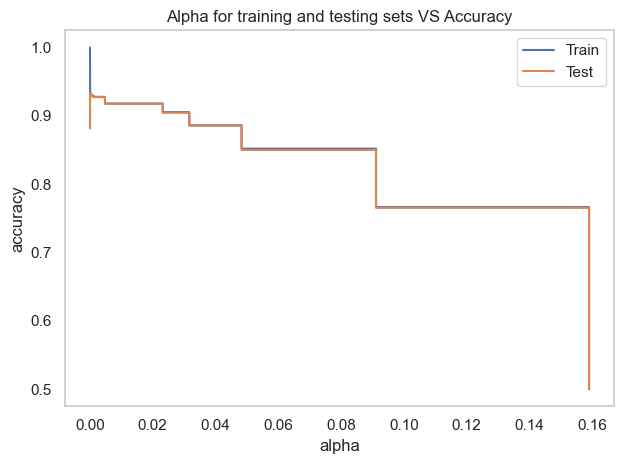

In [188]:
# DecisionTreeClassifier Post-Pruned
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Alpha for training and testing sets VS Accuracy")
ax.plot(alphas, postPrunAccuracyTrain, label="Train", drawstyle="steps-post")
ax.plot(alphas, postPrunAccuracyTest, label="Test", drawstyle="steps-post")
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [189]:
# DecisionTreeClassifier Post-Pruned
DTclf = DecisionTreeClassifier(random_state=5805, ccp_alpha=alphas[postPrunAccuracyTest.index(max(postPrunAccuracyTest))].round(5))
DTclf.fit(XTrain_DT, yTrain_DT)
yTrainPredPostPruned = DTclf.predict(XTrain_DT)
yTestPredPostPruned = DTclf.predict(XTest_DT)
yTestProbPostPruned= DTclf.predict_proba(XTest_DT)[::, -1]
postrePrunedAccuracy= accuracy_score(yTest_DT, yTestPredPostPruned)
postrePrunedAccuracy_train= accuracy_score(yTrain_DT, yTrainPredPostPruned)
print(f'Post-Pruned Test accuracy {accuracy_score(yTest_DT, yTestPredPostPruned).__round__(5)}')
print(f'Post-Pruned Train accuracy {accuracy_score(yTrain_DT, yTrainPredPostPruned).__round__(5)}')

Post-Pruned Test accuracy 0.93261
Post-Pruned Train accuracy 0.93382


In [190]:
# DecisionTreeClassifier Post-Pruned
for key, value in DTclf.get_params().items():
  print(f"{key}: {value}")

confusionMatrixPostPruned = confusion_matrix(yTest_DT, yTestPredPostPruned)
recallPostPruned = recall_score(yTest_DT, yTestPredPostPruned)
rocAucPostPruned = roc_auc_score(yTest_DT, yTestProbPostPruned)
specificityPostPruned = confusionMatrixPostPruned[0, 0] / (confusionMatrixPostPruned[0, 0] + confusionMatrixPostPruned[0, 1])
f_score_PostPruned = f1_score(yTest_DT, yTestPredPostPruned)


table1 = PrettyTable()
table1.field_names = ["","Accuracy", "confusion Matrix", "recall", 'AUC','Specificity','F-score']
table1.add_row(["Pre-Pruned",prePrunedAccuracy.round(2),confusionMatrixPrePruned,recallPrePruned.round(2),rocAucPrePruned.round(2),specificityPrePruned.round(3),f_score_PrePruned.round(3)])
table1.add_row(["Post-Pruned",postrePrunedAccuracy.round(2),confusionMatrixPostPruned,recallPostPruned.round(2),rocAucPostPruned.round(2),specificityPostPruned.round(3),f_score_PostPruned.round(3)])
print(table1)

ccp_alpha: 7e-05
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 5805
splitter: best
+-------------+----------+------------------+--------+------+-------------+---------+
|             | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-score |
+-------------+----------+------------------+--------+------+-------------+---------+
|  Pre-Pruned |   0.89   |  [[39366  5011]  |  0.89  | 0.93 |    0.887    |  0.888  |
|             |          |  [ 4931 39223]]  |        |      |             |         |
| Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|             |          |  [  162 43992]]  |        |      |             |         |
+-------------+----------+------------------+--------+------+-------------+---------+


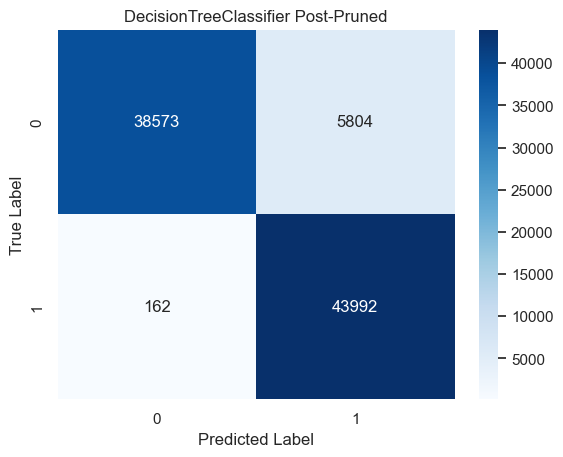

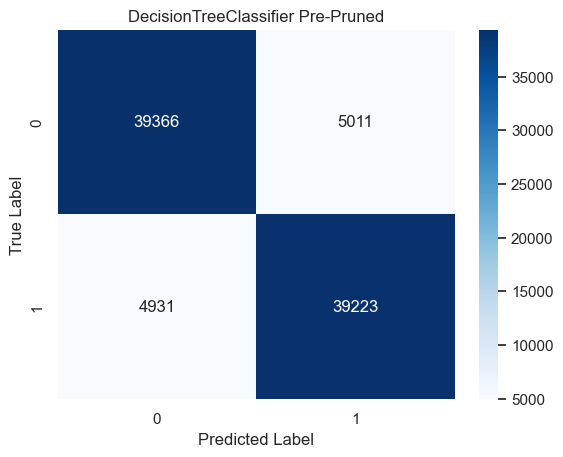

In [191]:
# DecisionTreeClassifier Post-Pruned
sns.heatmap(confusionMatrixPostPruned, annot=True, fmt='d', cmap='Blues')
plt.title("DecisionTreeClassifier Post-Pruned")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
# DecisionTreeClassifier Pre-Pruned
sns.heatmap(confusionMatrixPrePruned, annot=True, fmt='d', cmap='Blues')
plt.title("DecisionTreeClassifier Pre-Pruned")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [192]:
# DecisionTreeClassifier Post-Pruned
# K-fold
X = pd.concat([XTrain_DT, XTest_DT], axis=0, ignore_index=True)
Y= pd.concat([yTrain_DT, yTest_DT], axis=0, ignore_index=True)

from sklearn.model_selection import StratifiedKFold
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# for train_index, test_index in stratified_kfold.split(X, Y):
#     DTclf = DecisionTreeClassifier(random_state=5805, ccp_alpha=alphas[postPrunAccuracyTest.index(max(postPrunAccuracyTest))].round(5))
#     X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#     y_train_fold, y_test_fold = Y.iloc[train_index], Y.iloc[test_index]
# 
#     DTclf.fit(X_train_fold, y_train_fold)
#     fold_y_pred = DTclf.predict(X_test_fold)
#     
#     fold_accuracy = accuracy_score(y_test_fold, fold_y_pred)
#     
#     print(f"\nFold Accuracy: {fold_accuracy:.2%}")
    
    

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)
DTclf = DecisionTreeClassifier(random_state=5805, ccp_alpha=alphas[postPrunAccuracyTest.index(max(postPrunAccuracyTest))].round(5))
cv_accuracy = cross_val_score(DTclf, X, Y, cv=k_fold, scoring='accuracy', error_score='raise',n_jobs=-1)
print(f"\nDecisionTreeClassifier Post-Pruned Stratified K-fold Cross-Validation Accuracy: {np.mean(cv_accuracy):.2%}\n")


DecisionTreeClassifier Post-Pruned Stratified K-fold Cross-Validation Accuracy: 93.30%


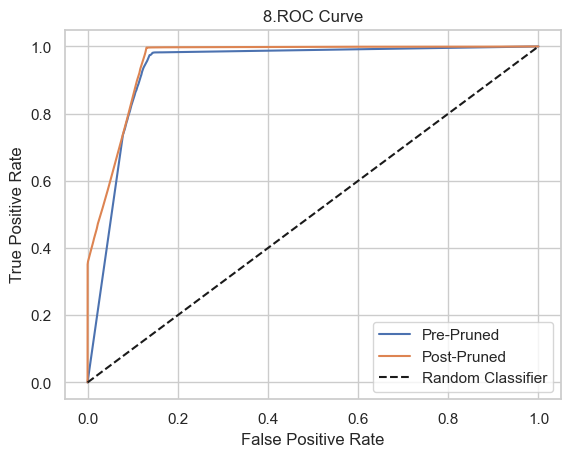

In [193]:
# Post-Pruned
fprPrePrunedtree, tprPrePrunedtree, _ = roc_curve(yTest_DT, yTestProbPrePruned)
fprPostPrunedtree, tprPostPrunedtree, _ = roc_curve(yTest_DT,yTestProbPostPruned)
plt.plot(fprPrePrunedtree, tprPrePrunedtree, label='Pre-Pruned')
plt.plot(fprPostPrunedtree, tprPostPrunedtree, label='Post-Pruned')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('8.ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
# Logistic regression
#remove  'Contract_Length_Quarterly','Usage_Frequency','Tenure','Subscription_Type_Premium’
removefeature= []
finalFeature= [item for item in ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly'] if item not in removefeature]

from sklearn.linear_model import LogisticRegression
encodingTrainDFForLR = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_LR = encodingTrainDFForLR[finalFeature]
yTrain_LR = encodingTrainDFForLR['Churn']

encodingTestDFForLR = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
XTest_LR = encodingTestDFForLR[finalFeature]
yTest_LR = encodingTestDFForLR['Churn']

removeFeature= ['Contract_Length_Quarterly','Usage_Frequency']
XTrain_LR= XTrain_LR.drop(removeFeature,axis=1)
XTest_LR=XTest_LR.drop(removeFeature,axis=1)

In [198]:
# Logistic regression
# gridSearch taking time and not executing
logregclf = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7,8),
    'solver': ['liblinear', 'saga'] 
}

grid_search = GridSearchCV(estimator=logregclf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(XTrain_LR, yTrain_LR)

print("Best parameters found:", grid_search.best_params_)

logregclf = grid_search.best_estimator_



Best parameters found: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [199]:
# Logistic regression
# logregclf = LogisticRegression()
# logregclf.fit(XTrain_LR, yTrain_LR)
logregYTestPred = logregclf.predict(XTest_LR)
logregAccuracy = accuracy_score(yTest_LR, logregYTestPred)
yTestProbLogreg= logregclf.predict_proba(XTest_LR)[::, -1]
print(f'Logistic regression Accuracy = {logregAccuracy.__round__(5)}')



Logistic regression Accuracy = 0.85257


+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |     0.87    |   0.94  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |     0.88    |   0.85  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
+---------------------------+----------+------------------+--------+------+-------------+---------+


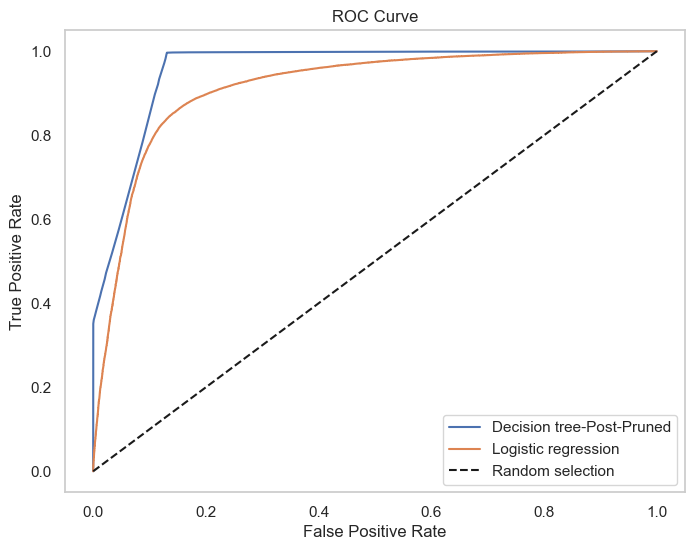

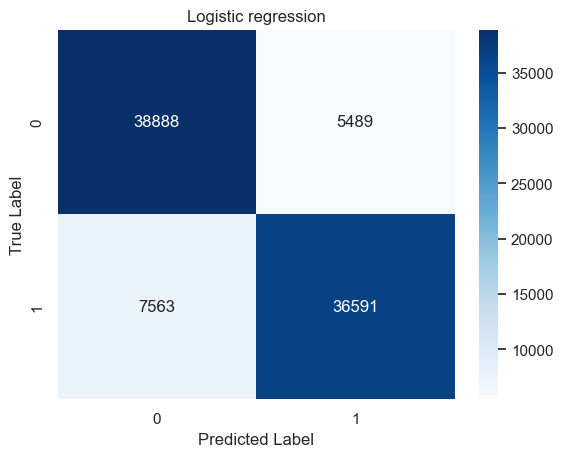

In [200]:
# Logistic regression
confusionMatrixlogreg = confusion_matrix(yTest_LR, logregYTestPred)
recallLogreg = recall_score(yTest_LR, logregYTestPred)
rocAucLogreg = roc_auc_score(yTest_LR, yTestProbLogreg)
specificityLogreg = confusionMatrixlogreg[0, 0] / (confusionMatrixlogreg[0, 0] + confusionMatrixlogreg[0, 1])
f_score_Logreg = f1_score(yTest_LR, logregYTestPred)

table2 = PrettyTable()
table2.field_names = ["","Accuracy", "confusion Matrix", "recall", 'AUC','Specificity','F-Score']
table2.add_row(["Decision Tree Post-Pruned",postrePrunedAccuracy.round(2), confusionMatrixPostPruned,recallPostPruned.round(2),rocAucPostPruned.round(2), specificityPostPruned.round(2),f_score_PostPruned.round(2)])
table2.add_row(["logistic regression",logregAccuracy.round(2),confusionMatrixlogreg.round(2),recallLogreg.round(2),rocAucLogreg.round(2),specificityLogreg.round(2),f_score_Logreg.round(2)])
print(table2)

fprlogregclf, tprlogregclf, _ = roc_curve(yTest_LR, yTestProbLogreg)
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprPostPrunedtree, tprPostPrunedtree,  label='Decision tree-Post-Pruned')
plt.plot(fprlogregclf, tprlogregclf, label='Logistic regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


sns.heatmap(confusionMatrixlogreg, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [201]:
# svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

encodingTrainDFForSVM = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDfSVM= Standardized(encodingTrainDFForSVM[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTrainDfSVM=pd.concat([standardizedTrainDfSVM,encodingTrainDFForSVM[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_SVM = standardizedTrainDfSVM
yTrain_SVM = encodingTrainDFForSVM['Churn']

encodingTestDFForSVM = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTestDfSVM= Standardized(encodingTestDFForSVM[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTestDfSVM=pd.concat([standardizedTestDfSVM,encodingTestDFForSVM[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)

XTest_SVM = standardizedTestDfSVM
yTest_SVM = encodingTestDFForSVM['Churn']

removeFeature= ['Contract_Length_Quarterly','Usage_Frequency']
XTrain_SVM= XTrain_SVM.drop(removeFeature,axis=1)
XTest_SVM=XTest_SVM.drop(removeFeature,axis=1)

In [202]:
# pip install imbalanced-learn

In [203]:
# underSampling for grid search
# from imblearn.under_sampling import RandomUnderSampler
# under_sample = RandomUnderSampler(sampling_strategy='auto', random_state=5805)
# Downsampling the data as it is taking long time.
# XTrain_SVM_GD, yTrain_SVM_GD = under_sample.fit_resample(XTrain_SVM, yTrain_SVM)
XTrain_SVM_GD = XTrain_SVM[::4]
yTrain_SVM_GD = yTrain_SVM[::4]
print(len(XTrain_SVM_GD))
print(len(yTrain_SVM_GD))

12500
12500


In [204]:
# #SVM
from sklearn.svm import SVC
svm_model = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(XTrain_SVM_GD, yTrain_SVM_GD)

best_params = grid_search.best_params_
print(f'Best parameters found:{best_params}')

Best parameters found:{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [205]:
# svm
from sklearn.svm import SVC
svmclf = SVC(kernel='rbf', C=10,probability=True,gamma= 'auto')
svmclf.fit(XTrain_SVM, yTrain_SVM)
svmYTestPred = svmclf.predict(XTest_SVM)
svmAccuracy = accuracy_score(yTest_SVM, svmYTestPred)

print(f'SVM Accuracy = {svmAccuracy.__round__(5)}')



SVM Accuracy = 0.91363


In [206]:
# from sklearn.metrics import accuracy_score
# svmAccuracy=accuracy_score(yTest_SVM, svmYTestPred)
# print(f'SVM Accuracy = {svmAccuracy.__round__(5)}')

In [207]:
yTestProbsvm= svmclf.predict_proba(XTest_SVM)[::, -1]
confusionMatrixsvm = confusion_matrix(yTest_SVM, svmYTestPred)
recallsvm = recall_score(yTest_SVM, svmYTestPred)
rocAucsvm = roc_auc_score(yTest_SVM, yTestProbsvm)
specificitysvm = confusionMatrixsvm[0, 0] / (confusionMatrixsvm[0, 0] + confusionMatrixsvm[0, 1])
f_score_svm = f1_score(yTest_SVM, svmYTestPred)

table2 = PrettyTable()
table2.field_names = ["","Accuracy", "confusion Matrix", "recall", 'AUC','Specificity','F-Score']
table2.add_row(["Decision Tree Post-Pruned",postrePrunedAccuracy.round(2), confusionMatrixPostPruned,recallPostPruned.round(2),rocAucPostPruned.round(2), specificityPostPruned.round(3),f_score_PostPruned.round(3)])
table2.add_row(["logistic regression",logregAccuracy.round(2),confusionMatrixlogreg.round(2),recallLogreg.round(2),rocAucLogreg.round(2),specificityLogreg.round(3),f_score_Logreg.round(3)])
table2.add_row(["SVM",svmAccuracy.round(2),confusionMatrixsvm.round(2),recallsvm.round(2),rocAucsvm.round(2), specificitysvm.round(3),f_score_svm.round(3)])
print(table2)

+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
+---------------------------+----------+------------------+--------+------+-------------+---------+


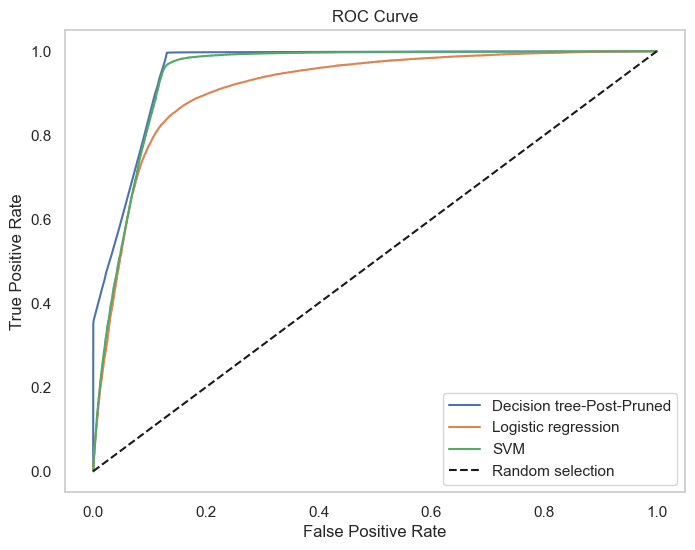

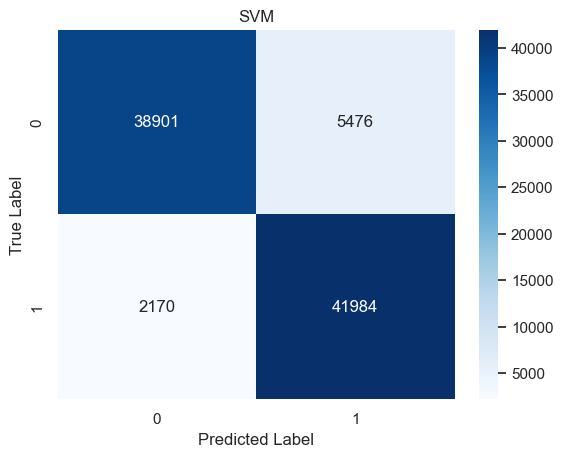

In [208]:
# svm
fprsvm, tprsvm, _ = roc_curve(yTest_SVM, yTestProbsvm)
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprPostPrunedtree, tprPostPrunedtree,  label='Decision tree-Post-Pruned')
plt.plot(fprlogregclf, tprlogregclf, label='Logistic regression')
plt.plot(fprsvm, tprsvm, label='SVM')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

#confusion Matrix
sns.heatmap(confusionMatrixsvm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [209]:
# Naïve Bayes
#remove  'Contract_Length_Quarterly','Usage_Frequency','Tenure','Subscription_Type_Premium’
removefeature= []
finalFeature= [item for item in ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly'] if item not in removefeature]


encodingTrainDFForNB = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_NB = encodingTrainDFForNB[finalFeature]
yTrain_NB = encodingTrainDFForNB['Churn']

encodingTestDFForNB = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
XTest_NB = encodingTestDFForNB[finalFeature]
yTest_NB = encodingTestDFForNB['Churn']

removeFeature= ['Contract_Length_Quarterly','Usage_Frequency']
XTrain_NB= XTrain_NB.drop(removeFeature,axis=1)
XTest_NB=XTest_NB.drop(removeFeature,axis=1)

In [210]:
# Naïve Bayes
# grid search




In [211]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
nbclf.fit(XTrain_NB, yTrain_NB)
nbYTestPred = nbclf.predict(XTest_NB)
nbAccuracy = accuracy_score(yTest_NB, nbYTestPred)
yTestProbnb= nbclf.predict_proba(XTest_NB)[::, -1]
print(f'Naïve Bayes = {nbAccuracy.__round__(5)}')

Naïve Bayes = 0.86329


In [212]:
# Naïve Bayes k-fold

X = pd.concat([XTrain_NB, XTest_NB], axis=0, ignore_index=True)
Y= pd.concat([yTrain_NB, yTest_NB], axis=0, ignore_index=True)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)
nb_clf = GaussianNB()
cv_accuracy = cross_val_score(nb_clf, X, Y, cv=k_fold, scoring='accuracy', error_score='raise',n_jobs=-1)
print(f"\nStratified K-fold Cross-Validation Accuracy: {np.mean(cv_accuracy):.2%}\n")


Stratified K-fold Cross-Validation Accuracy: 86.40%


In [213]:
# Naïve Bayes
confusionMatrixnb = confusion_matrix(yTest_NB, nbYTestPred)
recallnb = recall_score(yTest_NB, nbYTestPred)
rocAucnb = roc_auc_score(yTest_NB, yTestProbnb)
specificitynb = confusionMatrixnb[0, 0] / (confusionMatrixnb[0, 0] + confusionMatrixnb[0, 1])
f_score_nb = f1_score(yTest_NB, nbYTestPred)

table2 = PrettyTable()
table2.field_names = ["","Accuracy", "confusion Matrix", "recall", 'AUC','Specificity','F-Score']
table2.add_row(["Decision Tree Post-Pruned",postrePrunedAccuracy.round(2), confusionMatrixPostPruned,recallPostPruned.round(2),rocAucPostPruned.round(2), specificityPostPruned.round(3),f_score_PostPruned.round(3)])
table2.add_row(["logistic regression",logregAccuracy.round(2),confusionMatrixlogreg.round(2),recallLogreg.round(2),rocAucLogreg.round(2),specificityLogreg.round(3),f_score_Logreg.round(3)])
table2.add_row(["SVM",svmAccuracy.round(2),confusionMatrixsvm.round(2),recallsvm.round(2),rocAucsvm.round(2), specificitysvm.round(3),f_score_svm.round(3)])
table2.add_row(["Naïve Bayes",nbAccuracy.round(2),confusionMatrixnb.round(2),recallnb.round(2),rocAucnb.round(2),specificitynb.round(3),f_score_nb.round(3)])
print(table2)

+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
|        Naïve Bayes        |   0.86   |  [[40006  4371]  |  0.82  | 0.93 |    0.902    |  0.858  |


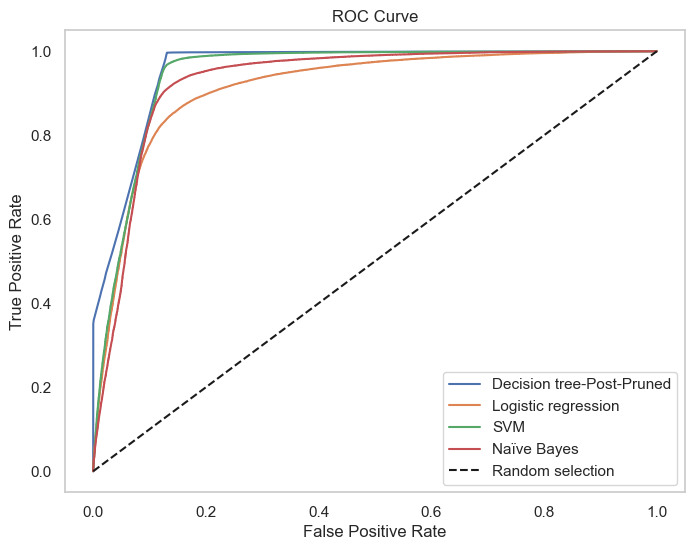

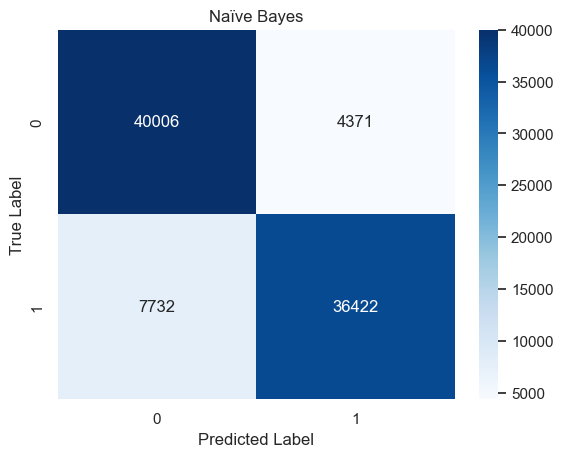

In [214]:
# Naïve Bayes
fprnb, tprnb, _ = roc_curve(yTest_NB, yTestProbnb)
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprPostPrunedtree, tprPostPrunedtree,  label='Decision tree-Post-Pruned')
plt.plot(fprlogregclf, tprlogregclf, label='Logistic regression')
plt.plot(fprsvm, tprsvm, label='SVM')
plt.plot(fprnb, tprnb, label='Naïve Bayes')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

#confusion Matrix
sns.heatmap(confusionMatrixnb, annot=True, fmt='d', cmap='Blues')
plt.title("Naïve Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [215]:
# KNN
removefeature=['Contract_Length_Quarterly','Usage_Frequency']
encodingTrainDFForKNN = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDfKNN= Standardized(encodingTrainDFForKNN[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTrainDfKNN=pd.concat([standardizedTrainDfKNN,encodingTrainDFForKNN[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_KNN = standardizedTrainDfKNN.drop(columns=removefeature)
yTrain_KNN = encodingTrainDFForKNN['Churn']

encodingTestDFForKNN = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTestDfKNN= Standardized(encodingTestDFForKNN[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTestDfKNN = pd.concat([standardizedTestDfKNN,encodingTestDFForKNN[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)

XTest_KNN = standardizedTestDfKNN.drop(columns=removefeature)
yTest_KNN = encodingTestDFForKNN['Churn']

# removeFeature= ['Contract_Length_Quarterly','Usage_Frequency']
# XTrain_KNN= XTrain_KNN.drop(removeFeature,axis=1)
# XTest_KNN=XTest_KNN.drop(removeFeature,axis=1)

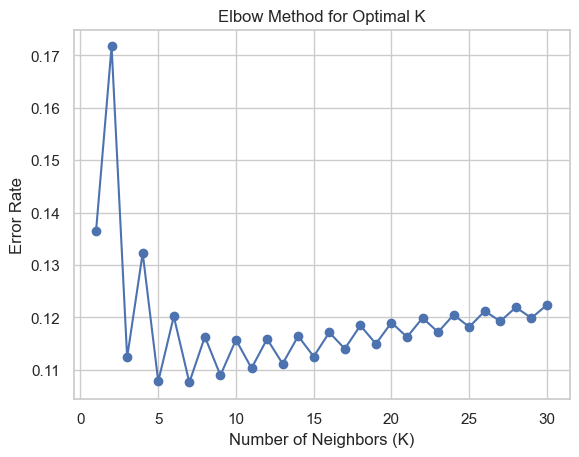

In [216]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
k_values = range(1,31)

# for k in k_values:
#     knnclf = KNeighborsClassifier(n_neighbors=k)
#     knnclf.fit(XTrain_KNN, yTrain_KNN)
#     knnYTestPred = knnclf.predict(XTest_KNN)
#     error_rates.append(np.mean(knnYTestPred != yTest_KNN))

for k in range(1, 31):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    knnclf.fit(XTrain_KNN, yTrain_KNN)
    knnYTestPred = knnclf.predict(XTest_KNN)
    error = 1 - knnclf.score(XTest_KNN, yTest_KNN)
    error_rates.append(error)
    # k_values.append(k)
    


plt.plot(k_values, error_rates, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.show()

In [217]:
# 5

In [218]:
# knn
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 31)
}
grid_search = GridSearchCV(knn_model, param_grid, cv=2, scoring='accuracy',return_train_score=True, verbose=1)
grid_search.fit(XTrain_KNN, yTrain_KNN)
print(f'Best parameters found {grid_search.best_params_}')

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found {'n_neighbors': 5}


In [219]:
# KNN
knnclf = grid_search.best_estimator_
knnYTestPred = knnclf.predict(XTest_KNN)
knnAccuracy= accuracy_score(yTest_KNN, knnYTestPred)
print(knnAccuracy)

0.8922411358733099


In [220]:
# KNN
# knnclf = KNeighborsClassifier(n_neighbors=25)
# knnclf.fit(XTrain_KNN, yTrain_KNN)
# knnYTestPred = knnclf.predict(XTest_KNN)
# knnAccuracy= accuracy_score(yTest_KNN, knnYTestPred)
# print(knnAccuracy)

In [221]:
# KNN
yTestProbknn= knnclf.predict_proba(XTest_KNN)[::, -1]
confusionMatrixknn = confusion_matrix(yTest_KNN, knnYTestPred)
recallknn = recall_score(yTest_KNN, knnYTestPred)
rocAucknn = roc_auc_score(yTest_KNN, yTestProbknn)
specificityknn = confusionMatrixknn[0, 0] / (confusionMatrixknn[0, 0] + confusionMatrixknn[0, 1])
f_score_knn = f1_score(yTest_KNN, knnYTestPred)

table2 = PrettyTable()
table2.field_names = ["","Accuracy", "confusion Matrix", "recall", 'AUC','Specificity','F-Score']
table2.add_row(["Decision Tree Post-Pruned",postrePrunedAccuracy.round(2), confusionMatrixPostPruned,recallPostPruned.round(2),rocAucPostPruned.round(2), specificityPostPruned.round(3),f_score_PostPruned.round(3)])
table2.add_row(["logistic regression",logregAccuracy.round(2),confusionMatrixlogreg.round(2),recallLogreg.round(2),rocAucLogreg.round(2),specificityLogreg.round(3),f_score_Logreg.round(3)])
table2.add_row(["SVM",svmAccuracy.round(2),confusionMatrixsvm.round(2),recallsvm.round(2),rocAucsvm.round(2), specificitysvm.round(3),f_score_svm.round(3)])
table2.add_row(["Naïve Bayes",nbAccuracy.round(2),confusionMatrixnb.round(2),recallnb.round(2),rocAucnb.round(2),specificitynb.round(3),f_score_nb.round(3)])
table2.add_row(["KNN",knnAccuracy.round(2),confusionMatrixknn.round(2),recallknn.round(2),rocAucknn.round(2),specificityknn.round(3),f_score_knn.round(3)])
print(table2)

+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
|        Naïve Bayes        |   0.86   |  [[40006  4371]  |  0.82  | 0.93 |    0.902    |  0.858  |


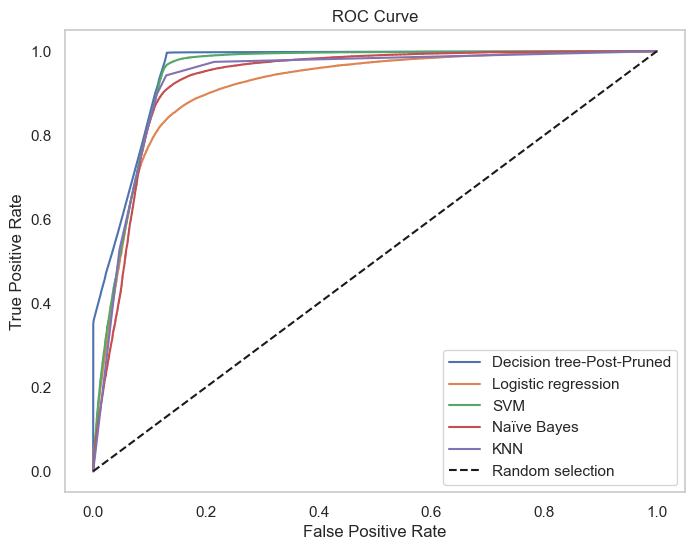

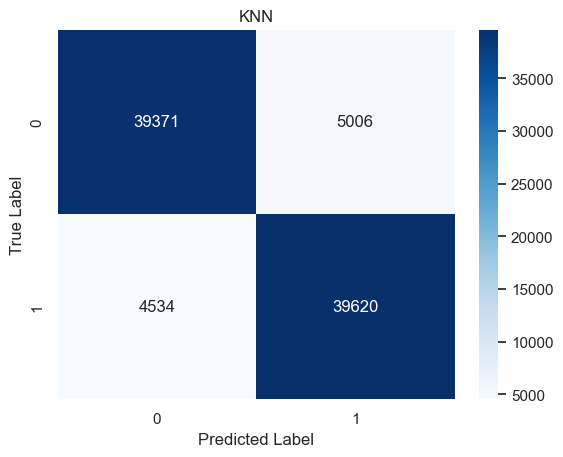

In [222]:
# KNN
fprknn, tprknn, _ = roc_curve(yTest_KNN, yTestProbknn)
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprPostPrunedtree, tprPostPrunedtree,  label='Decision tree-Post-Pruned')
plt.plot(fprlogregclf, tprlogregclf, label='Logistic regression')
plt.plot(fprsvm, tprsvm, label='SVM')
plt.plot(fprnb, tprnb, label='Naïve Bayes')
plt.plot(fprknn, tprknn, label='KNN')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

#confusion Matrix
sns.heatmap(confusionMatrixknn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [223]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
removefeature=['Contract_Length_Quarterly','Usage_Frequency']
finalFeature= [item for item in ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly'] if item not in removefeature]


encodingTrainDFForRF = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_RF = encodingTrainDFForRF[finalFeature]
yTrain_RF = encodingTrainDFForRF['Churn']

encodingTestDFForRF = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
XTest_RF = encodingTestDFForRF[finalFeature]
yTest_RF = encodingTestDFForRF['Churn']

# removeFeature= ['Contract_Length_Quarterly','Usage_Frequency']
# XTrain_RF= XTrain_RF.drop(removeFeature,axis=1)
# XTest_RF=XTest_SVM.drop(removeFeature,axis=1)

In [224]:
#Random Forest grid search
XTrain_RF_GD = XTrain_RF[::4]
yTrain_RF_GD = yTrain_RF[::4]

rf_clf = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [ 7, 9,13,11]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(XTrain_RF_GD, yTrain_RF_GD)
rfclf = grid_search.best_estimator_
randomForestBestParams= grid_search.best_params_
randomForestBestDepth= grid_search.best_params_['max_depth']
randomForestBestN_estimators= grid_search.best_params_['n_estimators']
print(f'Best parameters found {grid_search.best_params_}')

Best parameters found {'max_depth': 13, 'n_estimators': 100}


In [225]:
# Random Forest

# rfclf = RandomForestClassifier(n_estimators=100, random_state=5805)
# rfclf.fit(XTrain_RF, yTrain_RF)
rfYTestPred = rfclf.predict(XTest_RF)
rfAccuracy = accuracy_score(yTest_RF, rfYTestPred)
yTestProbrf= rfclf.predict_proba(XTest_RF)[::, -1]
print(f'Random Forest Test accuracy = {rfAccuracy.__round__(5)}')
print(f'Random Forest Train accuracy= {accuracy_score(yTrain_RF_GD, rfclf.predict(XTrain_RF_GD)).__round__(5)}')

Random Forest Test accuracy = 0.92887
Random Forest Train accuracy= 0.97944


In [226]:
# Random Forest
yTestProbrf= rfclf.predict_proba(XTest_RF)[::, -1]
confusionMatrixrf = confusion_matrix(yTest_RF, rfYTestPred)
recallrf = recall_score(yTest_RF, rfYTestPred)
rocAucrf = roc_auc_score(yTest_RF, yTestProbrf)
specificityrf = confusionMatrixrf[0, 0] / (confusionMatrixrf[0, 0] + confusionMatrixrf[0, 1])
f_score_rf = f1_score(yTest_RF, rfYTestPred)

table2 = PrettyTable()
table2.field_names = ["","Accuracy", "confusion Matrix", "recall", 'AUC','Specificity','F-Score']
table2.add_row(["Decision Tree Post-Pruned",postrePrunedAccuracy.round(2), confusionMatrixPostPruned,recallPostPruned.round(2),rocAucPostPruned.round(2), specificityPostPruned.round(3),f_score_PostPruned.round(3)])
table2.add_row(["logistic regression",logregAccuracy.round(2),confusionMatrixlogreg.round(2),recallLogreg.round(2),rocAucLogreg.round(2),specificityLogreg.round(3),f_score_Logreg.round(3)])
table2.add_row(["SVM",svmAccuracy.round(2),confusionMatrixsvm.round(2),recallsvm.round(2),rocAucsvm.round(2), specificitysvm.round(3),f_score_svm.round(3)])
table2.add_row(["Naïve Bayes",nbAccuracy.round(2),confusionMatrixnb.round(2),recallnb.round(2),rocAucnb.round(2),specificitynb.round(3),f_score_nb.round(3)])
table2.add_row(["KNN",knnAccuracy.round(2),confusionMatrixknn.round(2),recallknn.round(2),rocAucknn.round(2),specificityknn.round(3),f_score_knn.round(3)])
table2.add_row(["Random Forest",rfAccuracy.round(2),confusionMatrixrf.round(2),recallrf.round(2),rocAucrf.round(2),specificityrf.round(3),f_score_rf.round(3)])
print(table2)

+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
|        Naïve Bayes        |   0.86   |  [[40006  4371]  |  0.82  | 0.93 |    0.902    |  0.858  |


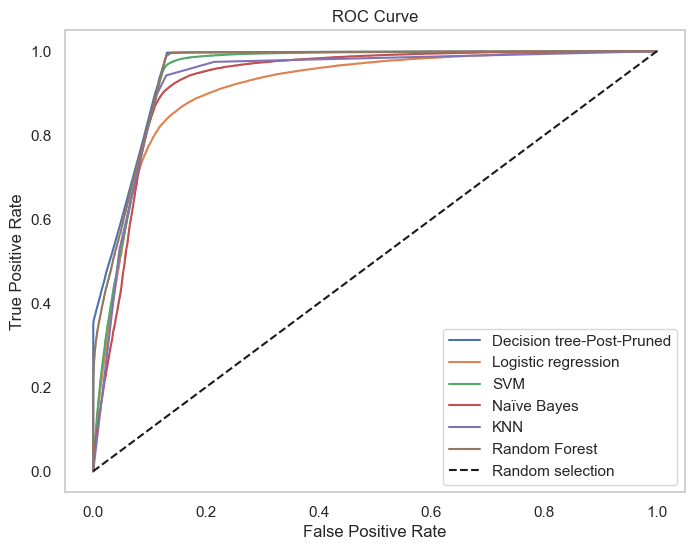

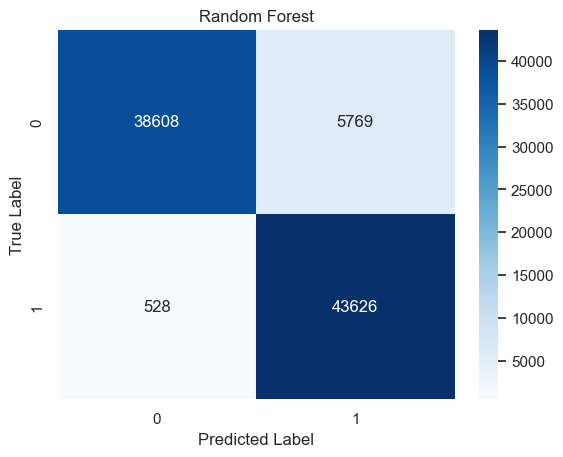

In [227]:
# Random Forest
fprrf, tprrf, _ = roc_curve(yTest_RF, yTestProbrf)
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprPostPrunedtree, tprPostPrunedtree,  label='Decision tree-Post-Pruned')
plt.plot(fprlogregclf, tprlogregclf, label='Logistic regression')
plt.plot(fprsvm, tprsvm, label='SVM')
plt.plot(fprnb, tprnb, label='Naïve Bayes')
plt.plot(fprknn, tprknn, label='KNN')
plt.plot(fprrf, tprrf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

#confusion Matrix
sns.heatmap(confusionMatrixrf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [228]:
# Bagging
from sklearn.ensemble import RandomForestClassifier
removefeature=['Contract_Length_Quarterly','Usage_Frequency']
finalFeature= [item for item in ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly'] if item not in removefeature]


encodingTrainDFForBA = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_BA = encodingTrainDFForBA[finalFeature]
yTrain_BA = encodingTrainDFForBA['Churn']

encodingTestDFForBA = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
XTest_BA = encodingTestDFForBA[finalFeature]
yTest_BA = encodingTestDFForBA['Churn']

In [229]:
# Bagging
from sklearn.ensemble import BaggingClassifier
XTrain_BA_GD = XTrain_BA[::4]
yTrain_BA_GD = yTrain_BA[::4]


ba_clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=randomForestBestN_estimators, max_depth= randomForestBestDepth), random_state=5805)
param_grid = {
    'n_estimators': [5,15,20],
}
grid_search = GridSearchCV(ba_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(XTrain_BA_GD, yTrain_BA_GD)
baclf = grid_search.best_estimator_


# baclf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=randomForestBestN_estimators, max_depth= randomForestBestDepth),n_estimators=10, random_state=5805)
# baclf.fit(XTrain_BA, yTrain_BA)
baYTestPred = baclf.predict(XTest_BA)
baAccuracy = accuracy_score(yTest_BA, baYTestPred)
yTestProbba= baclf.predict_proba(XTest_BA)[::, -1]
print(f'Bagging clf = {baAccuracy.__round__(5)}')
print(f'Best parameters found:{grid_search.best_params_}')

Bagging clf = 0.92819
Best parameters found:{'n_estimators': 15}


In [230]:
# Bagging
yTestProbba= baclf.predict_proba(XTest_BA)[::, -1]
confusionMatrixba = confusion_matrix(yTest_BA, baYTestPred)
recallba = recall_score(yTest_BA, baYTestPred)
rocAucba = roc_auc_score(yTest_BA, yTestProbba)
specificityba = confusionMatrixba[0, 0] / (confusionMatrixba[0, 0] + confusionMatrixba[0, 1])
f_score_ba = f1_score(yTest_BA, baYTestPred)

table2.add_row(["Bagging",baAccuracy.round(2),confusionMatrixba.round(2),recallba.round(2),rocAucba.round(2),specificityba.round(3),f_score_ba.round(3)])
print(table2)

+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
|        Naïve Bayes        |   0.86   |  [[40006  4371]  |  0.82  | 0.93 |    0.902    |  0.858  |


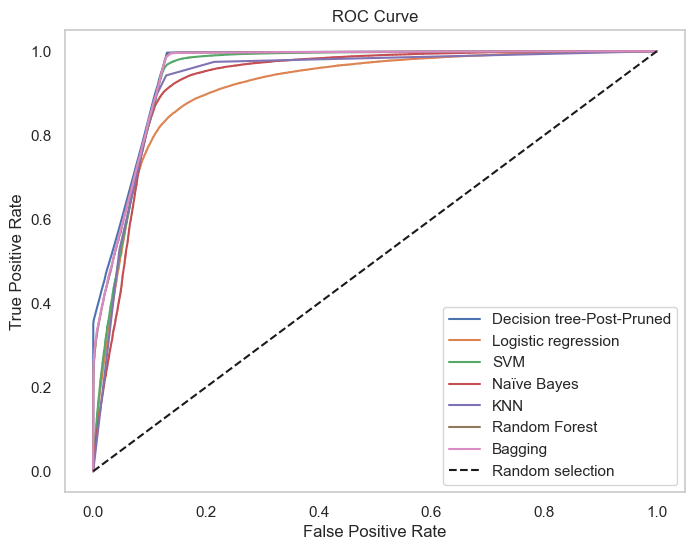

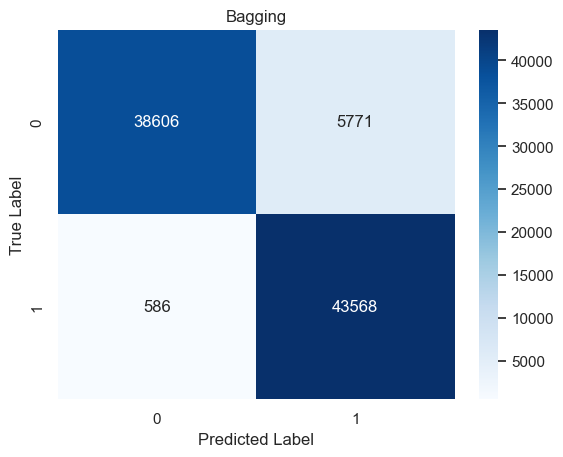

In [231]:
# Bagging
fprba, tprba, _ = roc_curve(yTest_BA, yTestProbba)
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprPostPrunedtree, tprPostPrunedtree,  label='Decision tree-Post-Pruned')
plt.plot(fprlogregclf, tprlogregclf, label='Logistic regression')
plt.plot(fprsvm, tprsvm, label='SVM')
plt.plot(fprnb, tprnb, label='Naïve Bayes')
plt.plot(fprknn, tprknn, label='KNN')
plt.plot(fprrf, tprrf, label='Random Forest')
plt.plot(fprba, tprba, label='Bagging')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

#confusion Matrix
sns.heatmap(confusionMatrixba, annot=True, fmt='d', cmap='Blues')
plt.title("Bagging")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [232]:
# Stacking
from sklearn.ensemble import RandomForestClassifier
removefeature=['Contract_Length_Quarterly','Usage_Frequency']
finalFeature= [item for item in ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly'] if item not in removefeature]


encodingTrainDFForST = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_ST = encodingTrainDFForST[finalFeature]
yTrain_ST = encodingTrainDFForST['Churn']

encodingTestDFForST = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
XTest_ST = encodingTestDFForST[finalFeature]
yTest_ST = encodingTestDFForST['Churn']

In [233]:
# Stacking
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier #, StackingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
base_estimators = [('rf', RandomForestClassifier(n_estimators=randomForestBestN_estimators, max_depth= randomForestBestDepth)),('gb', GradientBoostingClassifier(n_estimators=100, random_state=5805))]
final_estimator = LogisticRegression()
# stclf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

stclf = StackingClassifier(classifiers=[nbclf,rfclf], meta_classifier=final_estimator,use_probas=True, use_features_in_secondary=True)

stclf.fit(XTrain_ST, yTrain_ST)

stYTestPred = stclf.predict(XTest_ST)
stAccuracy = accuracy_score(yTest_ST, stYTestPred)
print(f'Stacking = {stAccuracy.__round__(5)}')

Stacking = 0.90177


+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
|        Naïve Bayes        |   0.86   |  [[40006  4371]  |  0.82  | 0.93 |    0.902    |  0.858  |


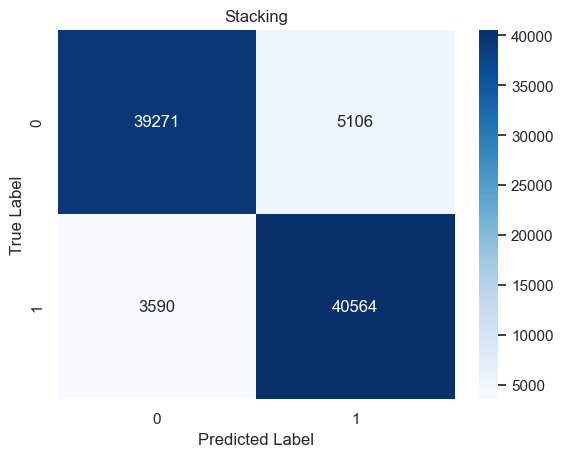

In [234]:
# Stacking
yTestProbst= stclf.predict_proba(XTest_ST)[::, -1]
confusionMatrixst = confusion_matrix(yTest_ST, stYTestPred)
recallst = recall_score(yTest_ST, stYTestPred)
rocAucst = roc_auc_score(yTest_ST, yTestProbst)
specificityst = confusionMatrixst[0, 0] / (confusionMatrixst[0, 0] + confusionMatrixst[0, 1])
f_score_st = f1_score(yTest_ST, stYTestPred)

table2.add_row(["Stacking",stAccuracy.round(2),confusionMatrixst.round(2),recallst.round(2),rocAucst.round(2),specificityst.round(3),f_score_st.round(3)])
print(table2)
fprst, tprst, _ = roc_curve(yTest_ST, yTestProbst)



#confusion Matrix
sns.heatmap(confusionMatrixst, annot=True, fmt='d', cmap='Blues')
plt.title("Stacking")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

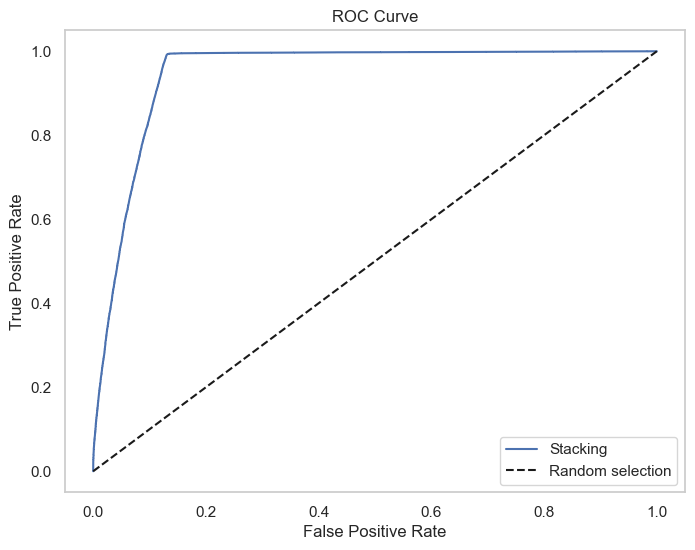

In [253]:
# ROC curves stacking
plt.figure(figsize=(8, 6))

plt.plot(fprst, tprst, label='Stacking')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [235]:
#Boosting
removefeature=['Contract_Length_Quarterly','Usage_Frequency']
finalFeature= [item for item in ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly'] if item not in removefeature]


encodingTrainDFForBOO = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_BOO = encodingTrainDFForBOO[finalFeature]
yTrain_BOO = encodingTrainDFForBOO['Churn']

encodingTestDFForBOO = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
XTest_BOO = encodingTestDFForBOO[finalFeature]
yTest_BOO = encodingTestDFForBOO['Churn']

In [236]:
#Boosting

XTrain_BOO_GD = XTrain_BOO[::4]
yTrain_BOO_GD = yTrain_BOO[::4]


from sklearn.ensemble import GradientBoostingClassifier

base_classifier = RandomForestClassifier( random_state=5805)
boo_clf = AdaBoostClassifier(base_classifier, random_state=5805)
param_grid = {
    'base_estimator__n_estimators': [10, 20, 50, 100],
}
grid_search = GridSearchCV(boo_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(XTrain_BOO_GD, yTrain_BOO_GD)
booclf = grid_search.best_estimator_

# base_classifier = RandomForestClassifier( random_state=5805)
# booclf = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=5805)
# booclf.fit(XTrain_BOO, yTrain_BOO)
booYTestPred = booclf.predict(XTest_BOO)
booAccuracy = accuracy_score(yTest_BOO, booYTestPred)
print(f'Boosting = {booAccuracy.__round__(5)}')
print(f'Best parameters found : {grid_search.best_params_}')

Boosting = 0.92931
Best parameters found : {'base_estimator__n_estimators': 100}


In [237]:
# performance grid function
# def setPerformanceGrid(clf,XTest_clf,yTest_clf,clfYTestPred,clfName):
#     clfAccuracy = accuracy_score(yTest_clf, clfYTestPred)
#     yTestProbclf= clf.predict_proba(XTest_clf)[::, -1]
#     confusionMatrixclf = confusion_matrix(yTest_clf, clfYTestPred)
#     recallclf = recall_score(yTest_clf, clfYTestPred)
#     rocAucclf = roc_auc_score(yTest_clf, yTestProbclf)
#     specificityclf = confusionMatrixclf[0, 0] / (confusionMatrixclf[0, 0] + confusionMatrixclf[0, 1])
#     f_score_clf = f1_score(yTest_clf, clfYTestPred)
#     
#     table2.add_row([clfName,clfAccuracy.round(2),confusionMatrixclf.round(2),recallclf.round(2),rocAucclf.round(2),specificityclf.round(3),f_score_clf.round(3)])
#     print(table2)    


+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
|        Naïve Bayes        |   0.86   |  [[40006  4371]  |  0.82  | 0.93 |    0.902    |  0.858  |


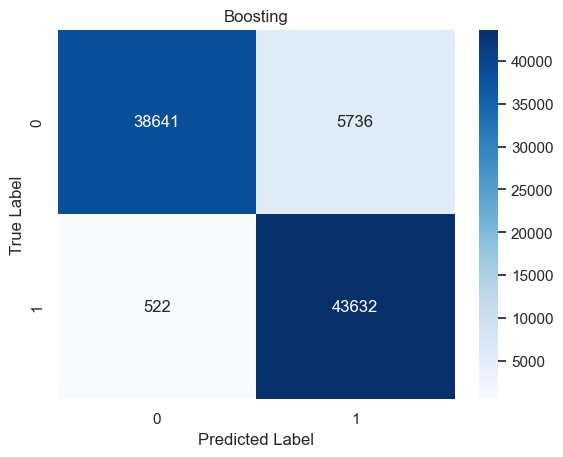

In [238]:
# Boosting
yTestProbboo= booclf.predict_proba(XTest_BOO)[::, -1]
confusionMatrixboo = confusion_matrix(yTest_BOO, booYTestPred)
recallboo = recall_score(yTest_BOO, booYTestPred)
rocAucboo = roc_auc_score(yTest_BOO, yTestProbboo)
specificityboo = confusionMatrixboo[0, 0] / (confusionMatrixboo[0, 0] + confusionMatrixboo[0, 1])
f_score_boo = f1_score(yTest_BOO, booYTestPred)
    
table2.add_row(['Boosting',booAccuracy.round(2),confusionMatrixboo.round(2),recallboo.round(2),rocAucboo.round(2),specificityboo.round(3),f_score_boo.round(3)])
print(table2)    


fprboo, tprboo, _ = roc_curve(yTest_BOO, yTestProbboo)


#confusion Matrix
sns.heatmap(confusionMatrixboo, annot=True, fmt='d', cmap='Blues')
plt.title("Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

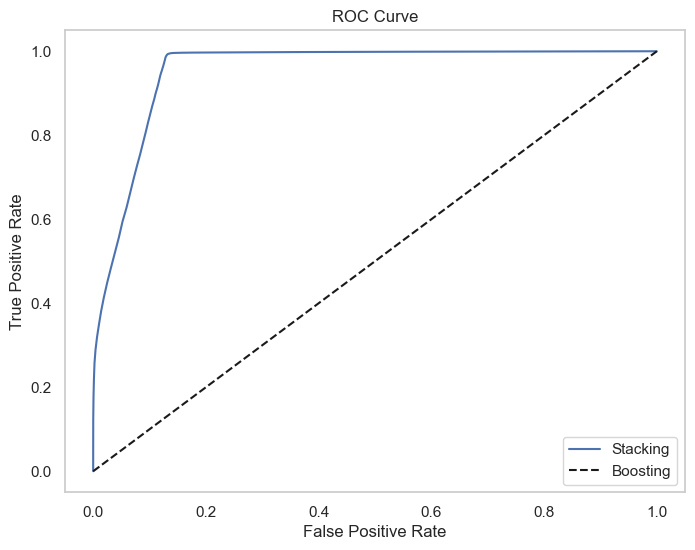

In [255]:
# ROC curves Boosting
plt.figure(figsize=(8, 6))

plt.plot(fprboo, tprboo, label='Stacking')
plt.plot([0, 1], [0, 1], 'k--', label='Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [239]:
# Boosting k-fold
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)
# booclf = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=5805)
# cv_accuracy = cross_val_score(booclf, XTest_BOO, yTest_BOO, cv=k_fold, scoring='accuracy', error_score='raise',n_jobs=-1)
# print(f"\nStratified K-fold Cross-Validation Accuracy: {np.mean(cv_accuracy):.2%}\n")


In [240]:
# Neural Network
removefeature=['Contract_Length_Quarterly','Usage_Frequency']
encodingTrainDFForNN = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDfNN= Standardized(encodingTrainDFForNN[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTrainDfNN=pd.concat([standardizedTrainDfNN,encodingTrainDFForNN[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_NN = standardizedTrainDfNN.drop(columns=removefeature)
yTrain_NN = encodingTrainDFForNN['Churn']


encodingTestDFForNN = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTestDfNN= Standardized(encodingTestDFForNN[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTestDfNN = pd.concat([standardizedTestDfNN,encodingTestDFForNN[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)

XTest_NN = standardizedTestDfNN.drop(columns=removefeature)
yTest_NN = encodingTestDFForNN['Churn']

In [241]:
# Neural Network
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neural_network import MLPClassifier

XTrain_NN_GD = XTrain_NN[::4]
yTrain_NN_GD = yTrain_NN[::4]
nn_clf = MLPClassifier(random_state=5805)
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 25, 10)],
    'max_iter': [100, 500]
}
grid_search = GridSearchCV(estimator=nn_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(XTrain_NN_GD, yTrain_NN_GD)
nnclf = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)
# nnYTestPred = cross_val_predict(nnclf, XTest_NN, yTest_NN, cv=cv,method='predict_proba')
# nnAccuracy = accuracy_score(yTest_NN, nnYTestPred.argmax(axis=1))

# nnclf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=5805)
# nnclf.fit(XTrain_NN, yTrain_NN)
nnYTestPred=nnclf.predict(XTest_NN)
nnAccuracy = accuracy_score(yTest_NN, nnYTestPred)
print(f'Neural Network = {nnAccuracy.__round__(5)}')


Best parameters found: {'hidden_layer_sizes': (50, 25, 10), 'max_iter': 100}
Neural Network = 0.9195


In [242]:
# Neural Network
yTestProbnn= nnclf.predict_proba(XTest_NN)[::, -1]
# confusionMatrixnn = confusion_matrix(yTest_NN, nnYTestPred.argmax(axis=1))
# recallnn = recall_score(yTest_NN, nnYTestPred.argmax(axis=1))
# rocAucnn = roc_auc_score(yTest_NN, nnYTestPred[:, 1])
# fprnn, tprnn, _ = roc_curve(yTest_NN, nnYTestPred[:, 1])

confusionMatrixnn = confusion_matrix(yTest_NN, nnYTestPred)
recallnn = recall_score(yTest_NN, nnYTestPred)
rocAucnn = roc_auc_score(yTest_NN, nnYTestPred)
specificitynn = confusionMatrixnn[0, 0] / (confusionMatrixnn[0, 0] + confusionMatrixnn[0, 1])
f_score_nn = f1_score(yTest_NN, nnYTestPred)



table2.add_row(["Neural Network",nnAccuracy.round(2),confusionMatrixnn.round(2),recallnn.round(2),rocAucnn.round(2),specificitynn.round(3),f_score_nn.round(3)])
print(table2)

fprnn, tprnn, _ = roc_curve(yTest_NN, nnYTestPred)

+---------------------------+----------+------------------+--------+------+-------------+---------+
|                           | Accuracy | confusion Matrix | recall | AUC  | Specificity | F-Score |
+---------------------------+----------+------------------+--------+------+-------------+---------+
| Decision Tree Post-Pruned |   0.93   |  [[38573  5804]  |  1.0   | 0.96 |    0.869    |  0.936  |
|                           |          |  [  162 43992]]  |        |      |             |         |
|    logistic regression    |   0.85   |  [[38888  5489]  |  0.83  | 0.91 |    0.876    |  0.849  |
|                           |          |  [ 7563 36591]]  |        |      |             |         |
|            SVM            |   0.91   |  [[38901  5476]  |  0.95  | 0.94 |    0.877    |  0.917  |
|                           |          |  [ 2170 41984]]  |        |      |             |         |
|        Naïve Bayes        |   0.86   |  [[40006  4371]  |  0.82  | 0.93 |    0.902    |  0.858  |


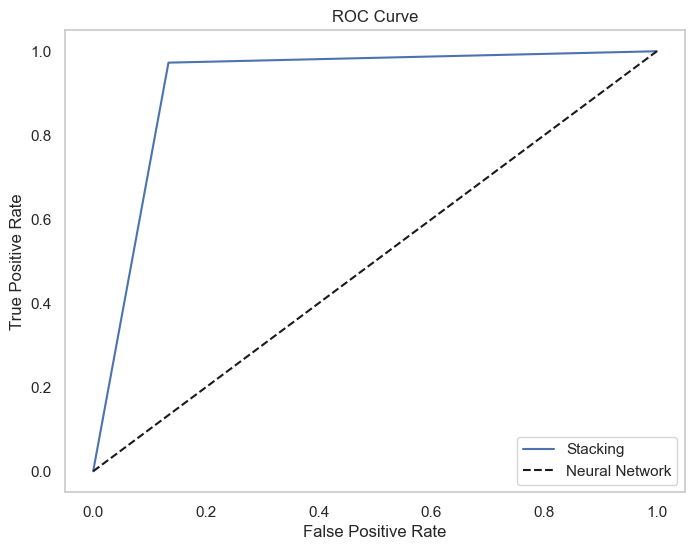

In [256]:
# ROC curves Boosting
plt.figure(figsize=(8, 6))

plt.plot(fprnn, tprnn, label='Stacking')
plt.plot([0, 1], [0, 1], 'k--', label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

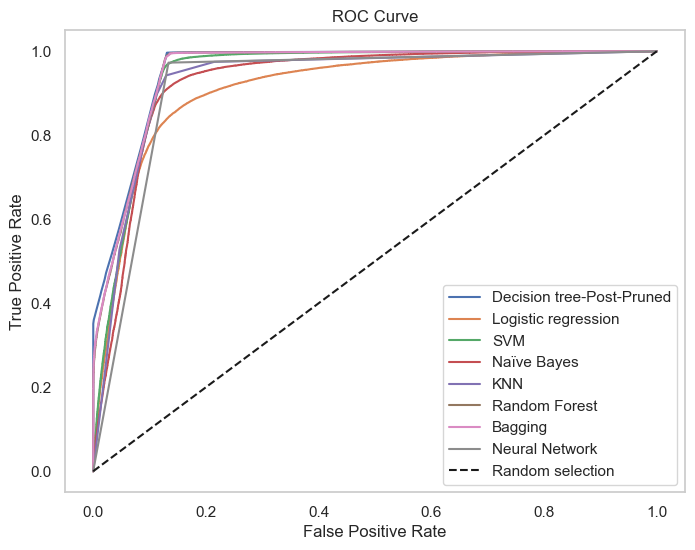

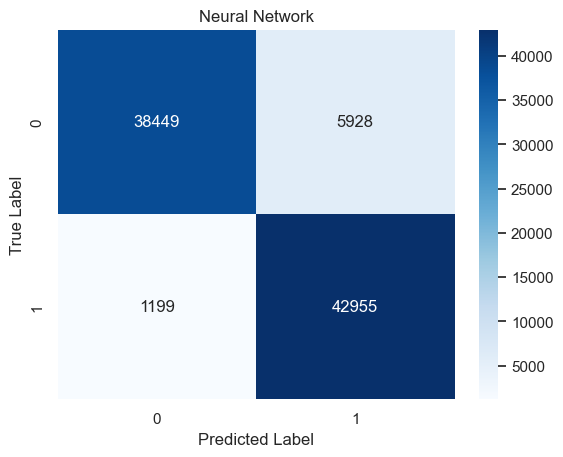

In [243]:
# Neural Network
# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprPostPrunedtree, tprPostPrunedtree,  label='Decision tree-Post-Pruned')
plt.plot(fprlogregclf, tprlogregclf, label='Logistic regression')
plt.plot(fprsvm, tprsvm, label='SVM')
plt.plot(fprnb, tprnb, label='Naïve Bayes')
plt.plot(fprknn, tprknn, label='KNN')
plt.plot(fprrf, tprrf, label='Random Forest')
plt.plot(fprba, tprba, label='Bagging')
plt.plot(fprnn, tprnn, label='Neural Network')
plt.plot([0, 1], [0, 1], 'k--', label='Random selection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


#confusion Matrix
sns.heatmap(confusionMatrixnn, annot=True, fmt='d', cmap='Blues')
plt.title("Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Phase IV: Clustering and Association

In [257]:
# k-mean
encodingTrainDFForKM = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTrainDfKM= Standardized(encodingTrainDFForKM[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTrainDfKM=pd.concat([standardizedTrainDfKM,encodingTrainDFForKM[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)
# encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
XTrain_KM = standardizedTrainDfKM
yTrain_KM = encodingTrainDFForKM['Churn']

encodingTestDFForKM = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
standardizedTestDfKM= Standardized(encodingTestDFForKM[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']])
standardizedTestDfKM = pd.concat([standardizedTestDfKM,encodingTestDFForKM[['Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']]], axis=1)

XTest_KM = standardizedTestDfKM
yTest_KM = encodingTestDFForKM['Churn']

removeFeature= ['Contract_Length_Quarterly','Usage_Frequency']
XTrain_KM= XTrain_KM.drop(removeFeature,axis=1)
XTest_KM=XTest_KM.drop(removeFeature,axis=1)

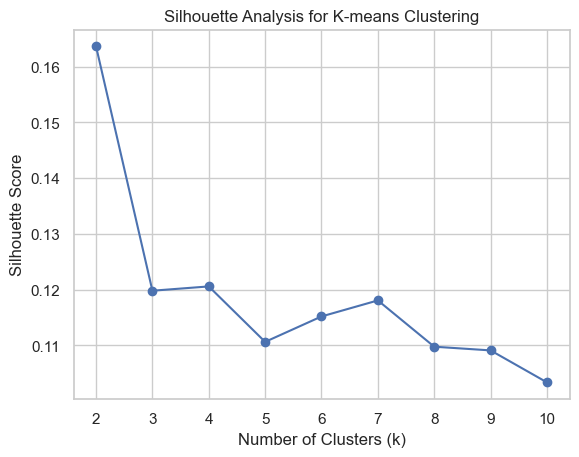

In [258]:
# K-mean
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5805)
    cluster_labels = kmeans.fit_predict(XTrain_KM)

    silhouette_avg = silhouette_score(XTrain_KM, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different k values
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()



# sil = []
# kmax = 15
# k=10
# 
# for k in range(2, kmax+1):
#     kmeans = KMeans(n_clusters=k).fit(XTrain_KM)
#     labels = kmeans.labels_
#     sil.append(silhouette_score(XTrain_KM, labels, metric='euclidean'))
# plt.figure()
# plt.plot(np.arange(2, k + 1, 1), sil, 'bx-')
# plt.xticks(np.arange(2,k+1,1))
# plt.grid()
# plt.xlabel('k')
# plt.ylabel('Silhouette score')
# plt.title('Silhouette Method')
# plt.show()




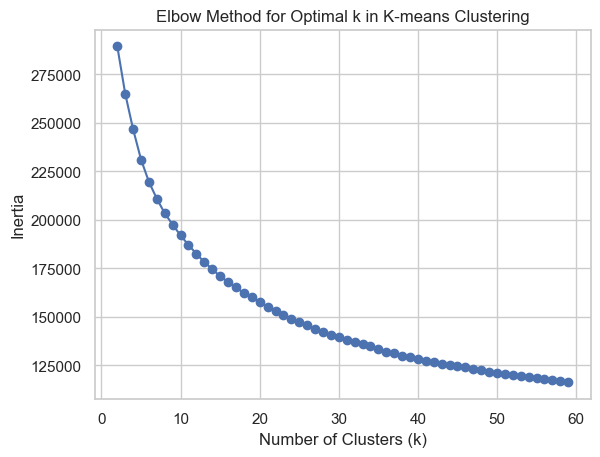

In [259]:
# K-mean
inertia_values = []
k_values = range(2, 60)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5805)
    kmeans.fit(XTrain_KM)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k in K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [272]:
# Apriori algorithm
# training_df['Tenure'].unique()
kmean_clusterDF=copy.deepcopy(training_df)
# divide 
kmean_clusterDF['Tenure'] = pd.cut(kmean_clusterDF['Tenure'], bins=3, labels=['Tenure_Short', 'Tenure_Medium', 'Tenure_Long'])
kmean_clusterDF['Usage_Frequency'] = pd.cut(kmean_clusterDF['Usage_Frequency'], bins=2, labels=['Usage_Frequency_Less', 'Usage_Frequency_High'])
kmean_clusterDF['Support_Calls'] = pd.cut(kmean_clusterDF['Support_Calls'], bins=3, labels=['Support_Calls_Low', 'Support_Calls_Medium','Support_Calls_High'])
kmean_clusterDF['Payment_Delay'] = pd.cut(kmean_clusterDF['Payment_Delay'], bins=3, labels=['No_Payment_Delay', 'Minor_Payment_Delay','High_Payment_Delay'])
kmean_clusterDF['Total_Spend'] = pd.cut(kmean_clusterDF['Total_Spend'], bins=3, labels=['Spend_Low','Spend_Medium','Spend_High'])
kmean_clusterDF['Last_Interaction'] = pd.cut(kmean_clusterDF['Last_Interaction'], bins=3, labels=['Interaction_Low','Interaction_Average','Interaction_High'])
kmean_clusterDF['Age'] = pd.cut(kmean_clusterDF['Age'], bins=2, labels=['Child','Adult'])
kmean_clusterDF['Churn'] = pd.cut(kmean_clusterDF['Churn'], bins=2, labels=['NO_Churn','Churn'])

kmean_clusterDF['Subscription_Type'] = kmean_clusterDF['Subscription_Type'].replace({
    'Premium': 'Subscription_Type_Premium',
    'Standard': 'Subscription_Type_Standard',
    'Basic': 'Subscription_Type_Basic'
})

kmean_clusterDF['Contract_Length'] = kmean_clusterDF['Contract_Length'].replace({
    'Annual': 'Contract_Length_Annual',
    'Monthly': 'Contract_Length_Monthly',
    'Quarterly': 'Contract_Length_Quarterly'
})
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
subsetData=kmean_clusterDF
transactions = subsetData.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
# print(df_encoded)
for i,j in df_encoded.dtypes.items():
    if j=='bool':
        df_encoded[i]= df_encoded[i].astype(int)
        
frequent_itemsets = apriori(df_encoded, min_support=0.22, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
# Display results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(NO_Churn),(Support_Calls_Low),0.50000,0.5781,0.42292,0.845840,1.463138,0.133870,2.736767,0.633075
1,(Support_Calls_Low),(NO_Churn),0.57810,0.5000,0.42292,0.731569,1.463138,0.133870,1.862676,0.750266
2,"(Child, NO_Churn)",(Support_Calls_Low),0.31546,0.5781,0.28822,0.913650,1.580436,0.105853,4.885924,0.536511
3,"(Child, Support_Calls_Low)",(NO_Churn),0.36286,0.5000,0.28822,0.794301,1.588602,0.106790,2.430734,0.581529
4,"(Male, NO_Churn)",(Support_Calls_Low),0.32490,0.5781,0.27912,0.859095,1.486067,0.091295,2.994218,0.484495
5,"(Male, Support_Calls_Low)",(NO_Churn),0.34858,0.5000,0.27912,0.800734,1.601469,0.104830,2.509214,0.576545
6,"(Spend_High, NO_Churn)",(Support_Calls_Low),0.28100,0.5781,0.24424,0.869181,1.503514,0.081794,3.225079,0.465774
7,"(Spend_High, Support_Calls_Low)",(NO_Churn),0.28938,0.5000,0.24424,0.844011,1.688023,0.099550,3.205361,0.573571
8,"(NO_Churn, Usage_Frequency_High)",(Support_Calls_Low),0.26562,0.5781,0.22508,0.847376,1.465795,0.071525,2.764309,0.432714
9,"(Usage_Frequency_High, Support_Calls_Low)",(NO_Churn),0.30218,0.5000,0.22508,0.744854,1.489708,0.073990,1.959663,0.471078


In [274]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

In [90]:
# Apriori algorithm
print("Association Rules:")
print(rules)

Association Rules:
                                            antecedents  \
0                             (Contract_Length_Monthly)   
1                                  (High_Payment_Delay)   
2                                           (Spend_Low)   
3                                  (Support_Calls_High)   
4                                (Support_Calls_Medium)   
...                                                 ...   
6788  (Minor_Payment_Delay, Male, Spend_High, Usage_...   
6789  (Minor_Payment_Delay, Male, Spend_High, Usage_...   
6790  (Male, Support_Calls_Low, No_Payment_Delay, Sp...   
6791  (Male, No_Payment_Delay, Spend_High, Usage_Fre...   
6792  (Male, No_Payment_Delay, Spend_High, Usage_Fre...   

                        consequents  antecedent support  consequent support  \
0                           (Churn)             0.19634             0.50000   
1                           (Churn)             0.20780             0.50000   
2                           (Churn)

In [275]:
# Apriori algorithm
frequent_itemsets
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_sorted

,support,itemsets
19,0.57810,(Support_Calls_Low)
9,0.56498,(Male)
1,0.55892,(Child)
23,0.51268,(Usage_Frequency_High)
2,0.50000,(Churn)
...,...,...
33,0.22286,"(Minor_Payment_Delay, Child)"
27,0.22280,"(Adult, Usage_Frequency_High)"
51,0.22270,"(Usage_Frequency_High, Female)"
73,0.22264,"(Child, Male, Support_Calls_Low)"


In [ ]:
print(frequent_itemsets_sorted)

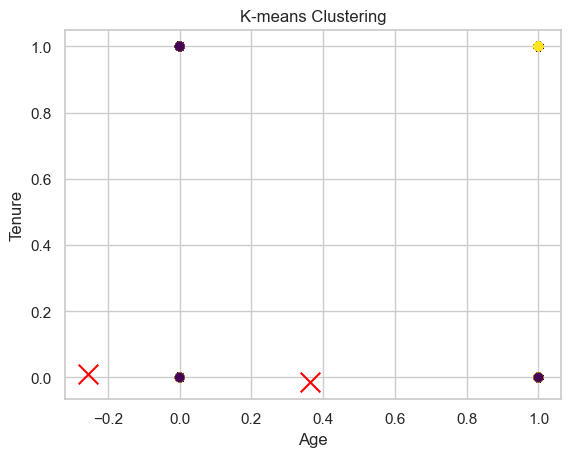

In [260]:
# k-mean
n_clusters = 2

# Create KMeans instance
kmeans = KMeans(n_clusters=n_clusters, random_state=5805)

features_for_clustering= XTrain_KM.columns

# Fit and predict cluster labels
XTrain_KM['cluster_label'] = kmeans.fit_predict(XTrain_KM)

# Visualize the clusters in a scatter plot
# plt.scatter(XTrain_KM['Contract_Length_Monthly'], XTrain_KM['Gender_Male'], c=XTrain_KM['cluster_label'], cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
# plt.title('K-means Clustering')
# plt.xlabel(features_for_clustering[0])
# plt.ylabel(features_for_clustering[1])
# plt.show()

In [65]:
#K-mean
removefeature=[]
finalFeature= [item for item in ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly'] if item not in removefeature]



XCat_KM=  training_df[['Gender', 'Subscription_Type', 'Contract_Length']]
XNum_KM= training_df[['Age','Tenure','Usage_Frequency','Support_Calls','Payment_Delay','Total_Spend','Last_Interaction']]

# encodingTrainDFForBOO = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# # encodingTrainDFForDT = encodingTrainDFForDT.drop(columns=['Contract_Length_Quarterly', 'Usage_Frequency', 'Subscription_Type_Premium', 'Subscription_Type_Standard'])
# XTrain_
# XTrain_BOO = encodingTrainDFForBOO[finalFeature]
# yTrain_BOO = encodingTrainDFForBOO['Churn']
# 
# encodingTestDFForBOO = pd.get_dummies(testing_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# XTest_BOO = encodingTestDFForBOO[finalFeature]
# yTest_BOO = encodingTestDFForBOO['Churn']

print(training_df.head(5))

    Age  Gender  Tenure  Usage_Frequency  Support_Calls  Payment_Delay  \
1  65.0  Female    49.0              1.0           10.0            8.0   
2  55.0  Female    14.0              4.0            6.0           18.0   
5  51.0    Male    33.0             25.0            9.0           26.0   
6  58.0  Female    49.0             12.0            3.0           16.0   
8  39.0    Male    12.0              5.0            7.0            4.0   

  Subscription_Type Contract_Length  Total_Spend  Last_Interaction  Churn  
1             Basic         Monthly        557.0               6.0    1.0  
2             Basic       Quarterly        185.0               3.0    1.0  
5           Premium          Annual        129.0               8.0    1.0  
6          Standard       Quarterly        821.0              24.0    1.0  
8          Standard       Quarterly        969.0              13.0    1.0  


In [66]:
#K-mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from kmodes.kmodes import KModes
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# numerical_features = XNum_KM
# categorical_features = XCat_KM

all_features = pd.concat([XNum_KM, XCat_KM], axis=1)

scaler = StandardScaler()
# numerical_features_scaled = scaler.fit_transform(numerical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, XNum_KM.columns),
        ('cat', 'passthrough', XCat_KM.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KModes(n_clusters=2, init='Huang', n_init=5, verbose=1))
])

pipeline.fit(all_features)

# training_df['cluster'] = pipeline.named_steps['kmeans'].labels_

# Assign cluster labels to the original data
# cluster = pd.Series(pipeline.named_steps['kmeans'].labels_)
# 
# # Visualize the clusters
# cluster_size = cluster.value_counts()
# plt.bar(cluster_size.index, cluster_size.values)
# plt.xlabel('Cluster')
# plt.ylabel('Number of Samples')
# plt.title('Cluster Sizes')
# plt.show()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 88396, cost: 2948115.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 75241, cost: 2943814.0
Run 2, iteration: 2/100, moves: 2824, cost: 2943814.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 111249, cost: 3014444.0
Run 3, iteration: 2/100, moves: 39025, cost: 3014444.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 43332, cost: 2948060.0
Run 4, iteration: 2/100, moves: 41600, cost: 2948060.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20525, cost: 2989532.0
Best run was number 2


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  Index(['Gender', 'Subscription_Type', 'Contract_Length'], dtype='object'))])),
                ('kmeans',
                 KModes(init='Huang', n_clusters=2, n_init=5, verbose=1))])

In [67]:
# all_features = pd.concat([XNum_KM, XCat_KM], axis=1)
# 
# scaler = StandardScaler()
# # numerical_features_scaled = scaler.fit_transform(numerical_features)
# 
# 
# 
# inertia_values = []
# 
# # Try different values of k
# for k in range(1, 11):
#     preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', scaler, XNum_KM.columns),
#         ('cat', 'passthrough', XCat_KM.columns)
#     ])
# 
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('kmeans', KModes(n_clusters=k, init='Huang', n_init=5, verbose=1))
#     ])
#     
#     pipeline.fit(all_features)
# 
#     # kmeans = KMeans(n_clusters=k, random_state=42)
#     # kmeans.fit(numerical_features_scaled)
#     inertia_values.append(pipeline.named_steps['kmeans'].inertia_)
# 
# # Plot the elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
# plt.title('Elbow Method for Optimal k (Titanic Dataset)')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Sum of Squared Distances (Inertia)')
# plt.grid(True)
# plt.show()

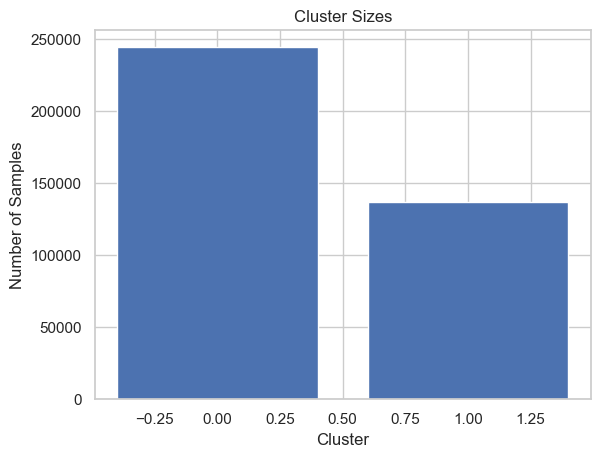

In [68]:
#K-mean
cluster = pd.Series(pipeline.named_steps['kmeans'].labels_)

# Visualize the clusters
cluster_size = cluster.value_counts()
plt.bar(cluster_size.index, cluster_size.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title('Cluster Sizes')
plt.show()

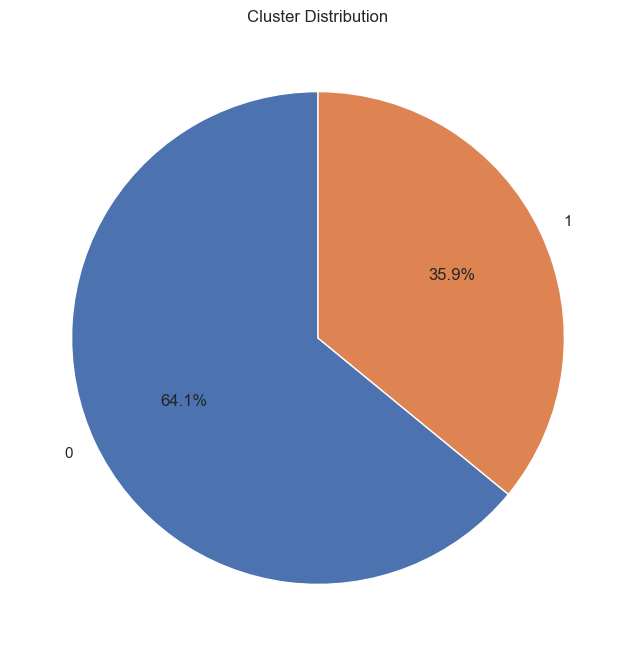

In [69]:
#K-mean
cluster_sizes = [50, 30]

# Assuming 'cluster_series' is the Pandas Series containing cluster labels
cluster_counts = cluster.value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Cluster Distribution')
plt.show()

In [ ]:
#K-mean
print('The sizes of the clusters are imbalanced, with the 0th cluster having the largest number of observations (175,000), followed by the 1st cluster (108,000) and the 2nd cluster (90,000) \nThe 0th cluster is significantly larger than the other clusters, suggesting that it might represent a more dominant or prevalent group in the dataset.\nThe large size of the dominant cluster could pose challenges in terms of interpretability. It might be more challenging to distinguish unique patterns within this cluster due to its size\nThe presence of multiple clusters indicates that there are distinct subgroups in the data. Each cluster may represent a different pattern or behavior among the observations\nThe results of association rule mining would depend on the specific features used and the relationships explored. The imbalanced cluster sizes may influence the rules generated, and its essential to consider the context of the analysis\n ')

In [ ]:
# # DBSCAN
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# 
# 
# numerical_preprocessor = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])
# 
# categorical_preprocessor = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder())
# ])
# 
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_preprocessor, XNum_KM.columns),
#         ('cat', categorical_preprocessor, XCat_KM.columns)
#     ])
# 
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('dbscan', DBSCAN(eps=0.5, min_samples=5))  
# ])
# all_features = pd.concat([XNum_KM, XCat_KM], axis=1)
# 
# labels = pipeline.fit_predict(all_features)
# 
# cluster_counts = pd.Series(labels).value_counts().sort_index()
# # Create a bar plot
# plt.bar(cluster_counts.index, cluster_counts.values)
# plt.xlabel('Cluster')
# plt.ylabel('Number of Samples')
# plt.title('Number of Samples in Each Cluster')
# plt.show()


In [ ]:
# Apriori algorithm

# divide 
# df_le['Length'] = pd.cut(df_le['Length'], bins=3, labels=['Short', 'Medium', 'Long'])

# from mlxtend.frequent_patterns import apriori, association_rules
# encodingTrainDFForAP = pd.get_dummies(training_df, columns=['Gender', 'Subscription_Type', 'Contract_Length'],drop_first=True)
# encodingTrainDFForAP[['Churn','Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']] = encodingTrainDFForAP[['Churn','Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']].astype(bool)
# frequent_itemsets = apriori(encodingTrainDFForAP[['Churn','Gender_Male','Subscription_Type_Premium','Subscription_Type_Standard','Contract_Length_Monthly','Contract_Length_Quarterly']], min_support=0.02, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
# 
# # Display results
# print("Association Rules:")
# 
# # print(rules)
# rules

In [ ]:

# print(frequent_itemsets)
# frequent_itemsets
# frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets_sorted